# Import Statements

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# import sklearn as sk
# import tensorflow as tf
# import keras as k
# import torch as torch

# Pre-Processing

## Importing Dataset

In [14]:
# importing 13 csv files 
cpi_df = pd.read_csv('Consumer prices indicators - FAOSTAT_data_en_2-22-2024.csv') # Consumer prices indicators
crop_prod_df = pd.read_csv('Crops production indicators - FAOSTAT_data_en_2-22-2024.csv') # Crops production indicators
emis_df = pd.read_csv('Emissions - FAOSTAT_data_en_2-27-2024.csv') # Emissions
employ_df = pd.read_csv('Employment - FAOSTAT_data_en_2-27-2024.csv') # Employment
exchange_df = pd.read_csv('Exchange rate - FAOSTAT_data_en_2-22-2024.csv') # Exchange rate
fertilizers_df = pd.read_csv('Fertilizers use - FAOSTAT_data_en_2-27-2024.csv') # Fertilizers use
food_bal_df = pd.read_csv('Food balances indicators - FAOSTAT_data_en_2-22-2024.csv') # Food balances indicators
food_sec_df = pd.read_csv('Food security indicators  - FAOSTAT_data_en_2-22-2024.csv') # Food security indicators
food_trade_df = pd.read_csv('Food trade indicators - FAOSTAT_data_en_2-22-2024.csv') # Food trade indicators
fdi_df = pd.read_csv('Foreign direct investment - FAOSTAT_data_en_2-27-2024.csv') # Foreign direct investment
temp_df = pd.read_csv('Land temperature change - FAOSTAT_data_en_2-27-2024.csv') # Land temperature change
low_memory=False
land_use_df = pd.read_csv('Land use - FAOSTAT_data_en_2-22-2024.csv')  # Land use
pest_df = pd.read_csv('Pesticides use - FAOSTAT_data_en_2-27-2024.csv') # Pesticides use

C:\Users\saqib\AppData\Local\Temp\ipykernel_332252\2656978315.py:14: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  land_use_df = pd.read_csv('Land use - FAOSTAT_data_en_2-22-2024.csv')  # Land use


## Extracting the Label

### Trade Indicators Dataset

In [15]:
# summarize food trade indicators
food_trade_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1991,1991,1000 USD,41600.0,A,Official figure,NaN
1,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1992,1992,1000 USD,25600.0,E,Estimated value,NaN
2,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1993,1993,1000 USD,40000.0,E,Estimated value,NaN
3,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1994,1994,1000 USD,25700.0,E,Estimated value,NaN
4,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1995,1995,1000 USD,37720.0,E,Estimated value,NaN


In [16]:
food_trade_df.shape

(141738, 15)

In [17]:
food_trade_df.describe()

,Area Code (M49),Element Code,Year Code,Year,Value,Note
count,141738.000000,141738.000000,141738.000000,141738.000000,1.417380e+05,0.0
mean,424.988359,5765.555010,2006.724273,2006.724273,4.572981e+05,NaN
std,253.512489,149.862005,9.168199,9.168199,1.876930e+06,NaN
min,4.000000,5622.000000,1991.000000,1991.000000,0.000000e+00,NaN
25%,204.000000,5622.000000,1999.000000,1999.000000,2.150000e+03,NaN
50%,414.000000,5622.000000,2007.000000,2007.000000,2.406200e+04,NaN
75%,643.000000,5922.000000,2015.000000,2015.000000,1.764239e+05,NaN
max,894.000000,5922.000000,2022.000000,2022.000000,8.355806e+07,NaN


In [18]:
food_trade_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141738 entries, 0 to 141737
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Domain Code       141738 non-null  object 
 1   Domain            141738 non-null  object 
 2   Area Code (M49)   141738 non-null  int64  
 3   Area              141738 non-null  object 
 4   Element Code      141738 non-null  int64  
 5   Element           141738 non-null  object 
 6   Item Code (CPC)   141738 non-null  object 
 7   Item              141738 non-null  object 
 8   Year Code         141738 non-null  int64  
 9   Year              141738 non-null  int64  
 10  Unit              141738 non-null  object 
 11  Value             141738 non-null  float64
 12  Flag              141738 non-null  object 
 13  Flag Description  141738 non-null  object 
 14  Note              0 non-null       float64
dtypes: float64(2), int64(4), object(9)
memory usage: 16.2+ MB


In [19]:
food_trade_df.isnull().sum()

Domain Code              0
Domain                   0
Area Code (M49)          0
Area                     0
Element Code             0
Element                  0
Item Code (CPC)          0
Item                     0
Year Code                0
Year                     0
Unit                     0
Value                    0
Flag                     0
Flag Description         0
Note                141738
dtype: int64

In [20]:
food_trade_df.eq(0).sum()

Domain Code            0
Domain                 0
Area Code (M49)        0
Area                   0
Element Code           0
Element                0
Item Code (CPC)        0
Item                   0
Year Code              0
Year                   0
Unit                   0
Value               6152
Flag                   0
Flag Description       0
Note                   0
dtype: int64

In [21]:
print(food_trade_df.columns)

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description', 'Note'],
      dtype='object')


In [22]:
# Get the unique number of years each Area has records for
area_year_count = food_trade_df.groupby('Area')['Year'].nunique()

# Check the distribution of the year counts per area
area_year_count.describe(), area_year_count.head()

(count    203.000000
 mean      30.566502
 std        5.362065
 min        1.000000
 25%       32.000000
 50%       32.000000
 75%       32.000000
 max       32.000000
 Name: Year, dtype: float64,
 Area
 Afghanistan            32
 Albania                32
 Algeria                32
 Angola                 32
 Antigua and Barbuda    32
 Name: Year, dtype: int64)

In [23]:
# Filter out areas with less than the maximum number of recorded years (32)
areas_with_incomplete_years = area_year_count[area_year_count < 32]

areas_with_incomplete_years

Area
Armenia                   31
Azerbaijan                31
Belarus                   31
Belgium                   23
Belgium-Luxembourg         9
Bosnia and Herzegovina    31
Croatia                   31
Czechia                   30
Czechoslovakia             2
Eritrea                   30
Estonia                   31
Ethiopia                  30
Ethiopia PDR               2
Georgia                   31
Kazakhstan                31
Kyrgyzstan                31
Latvia                    31
Lithuania                 31
Luxembourg                23
Montenegro                17
North Macedonia           31
Republic of Moldova       31
Russian Federation        31
Serbia                    17
Serbia and Montenegro     14
Slovakia                  30
Slovenia                  31
South Sudan               11
Sudan                     11
Sudan (former)            21
Tajikistan                31
Turkmenistan              31
USSR                       1
Ukraine                   31
Uzbekista

In [24]:
# Find the maximum year of data recorded for each area
max_year_per_area = food_trade_df.groupby('Area')['Year'].max()

# Filter areas where the last recorded year is 2000 or earlier
areas_missing_post_2000 = max_year_per_area[max_year_per_area <= 2000]

areas_missing_post_2000

Area
Belgium-Luxembourg    1999
Czechoslovakia        1992
Ethiopia PDR          1992
USSR                  1991
Yugoslav SFR          1991
Name: Year, dtype: int64

In [25]:
# Check the data for each year after 2000
years_after_2000 = range(2000, food_trade_df['Year'].max() + 1)  # Up to the most recent year in the data

# Group by 'Area' and get unique 'Year' to see which areas have data for every year after 2000
areas_with_complete_post_2000_data = food_trade_df[food_trade_df['Year'].isin(years_after_2000)].groupby('Area')['Year'].nunique()

# Filter areas that have all years after 2000 recorded
complete_areas_after_2000 = areas_with_complete_post_2000_data[areas_with_complete_post_2000_data == len(years_after_2000)]

complete_areas_after_2000

Area
Afghanistan                           23
Albania                               23
Algeria                               23
Angola                                23
Antigua and Barbuda                   23
                                      ..
Venezuela (Bolivarian Republic of)    23
Viet Nam                              23
Yemen                                 23
Zambia                                23
Zimbabwe                              23
Name: Year, Length: 192, dtype: int64

In [26]:
years_to_consider = range(2000, 2022)  # Assuming the dataset may contain data up to 2023

# Determine the number of these years
expected_year_count = len(years_to_consider)

# Calculate the actual count of data entries per area for years after 2000
actual_year_counts = food_trade_df[food_trade_df['Year'].isin(years_to_consider)].groupby('Area')['Year'].nunique()

# Identify areas that do not have records for every year after 2000
incomplete_areas_after_2000 = actual_year_counts[actual_year_counts < expected_year_count]

incomplete_areas_after_2000

Area
Montenegro               16
Serbia                   16
Serbia and Montenegro     6
South Sudan              10
Sudan                    10
Sudan (former)           12
Name: Year, dtype: int64

In [27]:
# Create a crosstab of areas and years to check for data presence
area_year_crosstab_new = pd.crosstab(food_trade_df['Area'], food_trade_df['Year'])

# Display the crosstab
area_year_crosstab_new.head(), area_year_crosstab_new.shape

(Year                 1991  1992  1993  1994  1995  1996  1997  1998  1999  \
 Area                                                                        
 Afghanistan            17    17    17    17    17    17    17    17    17   
 Albania                19    20    20    20    20    23    23    23    23   
 Algeria                24    24    24    24    24    24    24    24    24   
 Angola                 24    24    24    24    24    24    24    24    24   
 Antigua and Barbuda    20    20    20    20    20    20    20    20    20   
 
 Year                 2000  ...  2013  2014  2015  2016  2017  2018  2019  \
 Area                       ...                                             
 Afghanistan            17  ...    19    24    23    23    21    23    20   
 Albania                23  ...    24    20    22    24    19    20    17   
 Algeria                24  ...    24    24    24    24    24    24    24   
 Angola                 24  ...    24    23    24    24    23    23

In [28]:
# Attempt to create a crosstab of areas and years to check for data presence, focusing on simplicity
area_year_summary = pd.crosstab(food_trade_df['Area'], food_trade_df['Year']).replace(0, np.nan)

# Check for full coverage: if all values are non-null in a row, the area has complete data for all years in the dataset
area_year_coverage = area_year_summary.notnull().all(axis=1)

# Display a summary showing whether each area has complete data for all years
area_year_coverage.head(), area_year_coverage.all()


(Area
 Afghanistan            True
 Albania                True
 Algeria                True
 Angola                 True
 Antigua and Barbuda    True
 dtype: bool,
 False)

In [29]:
# Pivot the table to separate Import and Export Values
food_trade_pivot_df = food_trade_df.pivot_table(
    index=["Area Code (M49)", "Area", "Item Code (CPC)", "Item", "Year"],
    columns="Element",
    values="Value",
    fill_value=None
).reset_index()

# Rename the pivoted columns for clarity
food_trade_pivot_df.columns.name = None  # Remove the name of the columns index
food_trade_pivot_df.rename(columns={
    'Import Value': 'ImportValue',
    'Export Value': 'ExportValue'
}, inplace=True)

In [30]:
# Display the transformed data
food_trade_pivot_df.head()

,Area Code (M49),Area,Item Code (CPC),Item,Year,ExportValue,ImportValue
0,4,Afghanistan,F1844,Fats and Oils (excluding Butter),1991,NaN,28300.0
1,4,Afghanistan,F1844,Fats and Oils (excluding Butter),1992,NaN,34800.0
2,4,Afghanistan,F1844,Fats and Oils (excluding Butter),1993,NaN,12000.0
3,4,Afghanistan,F1844,Fats and Oils (excluding Butter),1994,NaN,5300.0
4,4,Afghanistan,F1844,Fats and Oils (excluding Butter),1995,NaN,61400.0


In [31]:
food_trade_pivot_df.shape

(73994, 7)

In [32]:
null_percentage = food_trade_pivot_df.isnull().mean() * 100

# Print the result
print(null_percentage)

Area Code (M49)    0.000000
Area               0.000000
Item Code (CPC)    0.000000
Item               0.000000
Year               0.000000
ExportValue        8.338514
ImportValue        0.108117
dtype: float64


In [33]:
# Further pivot the data to turn items into columns with sub-columns for Import and Export values
food_trade_pivot_item_df = food_trade_pivot_df.pivot_table(
    index=["Area", "Year"],
    columns=["Item"],
    values=["ImportValue", "ExportValue"],
    fill_value=None
).reset_index()

# Simplify multi-level columns for easier access
food_trade_pivot_item_df.columns = ['_'.join(col).strip() for col in food_trade_pivot_item_df.columns.values]
food_trade_pivot_item_df.rename(columns={'Area Code (M49)_': 'Area Code (M49)', 'Area_': 'Area', 'Year_': 'Year'}, inplace=True)

# Display the transformed data
food_trade_pivot_item_df.head()

,Area,Year,ExportValue_Alcoholic Beverages,ExportValue_Cereals and Preparations,ExportValue_Dairy Products and Eggs,ExportValue_Fats and Oils (excluding Butter),ExportValue_Fruit and Vegetables,ExportValue_Meat and Meat Preparations,ExportValue_Non-alcoholic Beverages,ExportValue_Non-edible Fats and Oils,...,ImportValue_Dairy Products and Eggs,ImportValue_Fats and Oils (excluding Butter),ImportValue_Fruit and Vegetables,ImportValue_Meat and Meat Preparations,ImportValue_Non-alcoholic Beverages,ImportValue_Non-edible Fats and Oils,ImportValue_Non-food,ImportValue_Other food,ImportValue_Sugar and Honey,ImportValue_Tobacco
0,Afghanistan,1991,NaN,NaN,NaN,NaN,51858.0,NaN,NaN,NaN,...,4590.0,28300.0,360.0,203.0,0.0,0.0,12000.0,26360.0,4900.0,12000.0
1,Afghanistan,1992,NaN,NaN,NaN,NaN,19062.0,NaN,NaN,NaN,...,3550.0,34800.0,1705.0,1410.0,0.0,0.0,15200.0,18300.0,17800.0,15200.0
2,Afghanistan,1993,NaN,NaN,NaN,NaN,21324.0,NaN,NaN,NaN,...,4020.0,12000.0,2336.0,100.0,0.0,0.0,17800.0,28040.0,14100.0,17800.0
3,Afghanistan,1994,NaN,NaN,NaN,NaN,26907.0,NaN,NaN,NaN,...,3700.0,5300.0,897.0,120.0,0.0,0.0,21000.0,21680.0,16800.0,21000.0
4,Afghanistan,1995,NaN,NaN,NaN,NaN,24240.0,NaN,NaN,NaN,...,1500.0,61400.0,906.0,170.0,0.0,0.0,24600.0,45315.0,19200.0,24600.0


There are a total of 12 items in the dataset, and there are corresponding import and export values for them. We want the export values of the items as the label. However, we will also keep the import values as a possible feature for our analysis. 

Since the label should be a single column, we want to combine some of the items as a single column for crop export values. 

In [34]:
food_trade_pivot_item_df.columns

Index(['Area', 'Year', 'ExportValue_Alcoholic Beverages',
       'ExportValue_Cereals and Preparations',
       'ExportValue_Dairy Products and Eggs',
       'ExportValue_Fats and Oils (excluding Butter)',
       'ExportValue_Fruit and Vegetables',
       'ExportValue_Meat and Meat Preparations',
       'ExportValue_Non-alcoholic Beverages',
       'ExportValue_Non-edible Fats and Oils', 'ExportValue_Non-food',
       'ExportValue_Other food', 'ExportValue_Sugar and Honey',
       'ExportValue_Tobacco', 'ImportValue_Alcoholic Beverages',
       'ImportValue_Cereals and Preparations',
       'ImportValue_Dairy Products and Eggs',
       'ImportValue_Fats and Oils (excluding Butter)',
       'ImportValue_Fruit and Vegetables',
       'ImportValue_Meat and Meat Preparations',
       'ImportValue_Non-alcoholic Beverages',
       'ImportValue_Non-edible Fats and Oils', 'ImportValue_Non-food',
       'ImportValue_Other food', 'ImportValue_Sugar and Honey',
       'ImportValue_Tobacco'],
    

In [35]:
food_trade_pivot_item_df.shape

(6205, 26)

In [36]:
food_trade_pivot_item_df.describe()

,Year,ExportValue_Alcoholic Beverages,ExportValue_Cereals and Preparations,ExportValue_Dairy Products and Eggs,ExportValue_Fats and Oils (excluding Butter),ExportValue_Fruit and Vegetables,ExportValue_Meat and Meat Preparations,ExportValue_Non-alcoholic Beverages,ExportValue_Non-edible Fats and Oils,ExportValue_Non-food,...,ImportValue_Dairy Products and Eggs,ImportValue_Fats and Oils (excluding Butter),ImportValue_Fruit and Vegetables,ImportValue_Meat and Meat Preparations,ImportValue_Non-alcoholic Beverages,ImportValue_Non-edible Fats and Oils,ImportValue_Non-food,ImportValue_Other food,ImportValue_Sugar and Honey,ImportValue_Tobacco
count,6205.000000,5.611000e+03,5.831000e+03,5.521000e+03,5.684000e+03,6.054000e+03,5.594000e+03,5.468000e+03,4.559000e+03,6.117000e+03,...,6.193000e+03,6.200000e+03,6.205000e+03,6.198000e+03,6.130000e+03,5.875000e+03,6.180000e+03,6.196000e+03,6.200000e+03,6.153000e+03
mean,2006.610475,3.180062e+05,6.782639e+05,3.195781e+05,3.255954e+05,8.874041e+05,5.499639e+05,8.715983e+04,4.110806e+04,8.177835e+05,...,3.012391e+05,3.413992e+05,8.867296e+05,5.224954e+05,7.560188e+04,3.693347e+04,8.924568e+05,1.015563e+06,1.841847e+05,1.807273e+05
std,9.202286,1.289264e+06,2.276438e+06,1.153470e+06,1.514772e+06,2.838693e+06,1.879297e+06,2.954140e+05,2.127155e+05,2.527868e+06,...,8.484632e+05,1.120032e+06,2.942384e+06,1.880293e+06,2.513143e+05,1.588565e+05,2.527348e+06,3.996381e+06,4.246411e+05,4.683390e+05
min,1991.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1999.000000,2.490000e+02,6.588750e+02,8.000000e+01,3.320875e+02,4.106342e+03,4.800000e+01,1.018075e+02,1.100000e+01,4.517000e+03,...,1.024600e+04,1.150768e+04,1.316700e+04,5.835000e+03,1.785618e+03,9.600000e+01,1.537870e+04,1.885868e+04,1.003527e+04,4.865000e+03
50%,2007.000000,5.699000e+03,1.879300e+04,4.280920e+03,8.734500e+03,5.504950e+04,4.159500e+03,2.837475e+03,5.273600e+02,6.777326e+04,...,3.690100e+04,4.970300e+04,6.996400e+04,3.150250e+04,9.197880e+03,1.288000e+03,9.014400e+04,9.592849e+04,4.020396e+04,2.425577e+04
75%,2015.000000,7.469710e+04,2.301477e+05,9.743600e+04,9.904692e+04,3.872308e+05,7.691150e+04,3.226250e+04,9.372235e+03,4.040527e+05,...,1.795366e+05,2.102632e+05,4.156002e+05,1.911785e+05,4.621089e+04,1.180302e+04,5.543950e+05,5.079894e+05,1.621348e+05,1.230500e+05
max,2022.000000,1.957636e+07,3.692022e+07,1.298231e+07,3.431998e+07,2.968958e+07,2.545855e+07,3.581458e+06,5.274334e+06,3.208409e+07,...,1.123472e+07,2.151904e+07,5.282910e+07,3.873246e+07,4.872912e+06,4.365822e+06,3.476376e+07,8.355806e+07,7.252753e+06,6.127804e+06


In [37]:
food_trade_pivot_item_df.isnull().sum()

Area                                               0
Year                                               0
ExportValue_Alcoholic Beverages                  594
ExportValue_Cereals and Preparations             374
ExportValue_Dairy Products and Eggs              684
ExportValue_Fats and Oils (excluding Butter)     521
ExportValue_Fruit and Vegetables                 151
ExportValue_Meat and Meat Preparations           611
ExportValue_Non-alcoholic Beverages              737
ExportValue_Non-edible Fats and Oils            1646
ExportValue_Non-food                              88
ExportValue_Other food                            52
ExportValue_Sugar and Honey                      497
ExportValue_Tobacco                              681
ImportValue_Alcoholic Beverages                   26
ImportValue_Cereals and Preparations               0
ImportValue_Dairy Products and Eggs               12
ImportValue_Fats and Oils (excluding Butter)       5
ImportValue_Fruit and Vegetables              

In [38]:
null_percentage = food_trade_pivot_item_df.isnull().mean() * 100

# Print the result
print(null_percentage)

Area                                             0.000000
Year                                             0.000000
ExportValue_Alcoholic Beverages                  9.572925
ExportValue_Cereals and Preparations             6.027397
ExportValue_Dairy Products and Eggs             11.023368
ExportValue_Fats and Oils (excluding Butter)     8.396454
ExportValue_Fruit and Vegetables                 2.433521
ExportValue_Meat and Meat Preparations           9.846898
ExportValue_Non-alcoholic Beverages             11.877518
ExportValue_Non-edible Fats and Oils            26.526994
ExportValue_Non-food                             1.418211
ExportValue_Other food                           0.838034
ExportValue_Sugar and Honey                      8.009670
ExportValue_Tobacco                             10.975020
ImportValue_Alcoholic Beverages                  0.419017
ImportValue_Cereals and Preparations             0.000000
ImportValue_Dairy Products and Eggs              0.193392
ImportValue_Fa

In [39]:
food_trade_pivot_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6205 entries, 0 to 6204
Data columns (total 26 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Area                                          6205 non-null   object 
 1   Year                                          6205 non-null   int64  
 2   ExportValue_Alcoholic Beverages               5611 non-null   float64
 3   ExportValue_Cereals and Preparations          5831 non-null   float64
 4   ExportValue_Dairy Products and Eggs           5521 non-null   float64
 5   ExportValue_Fats and Oils (excluding Butter)  5684 non-null   float64
 6   ExportValue_Fruit and Vegetables              6054 non-null   float64
 7   ExportValue_Meat and Meat Preparations        5594 non-null   float64
 8   ExportValue_Non-alcoholic Beverages           5468 non-null   float64
 9   ExportValue_Non-edible Fats and Oils          4559 non-null   f

In [40]:
# food_trade_pivot_item_df = food_trade_pivot_item_df.fillna(0)

For crops, we need 

        'ExportValue_Alcoholic Beverages',

       'ExportValue_Cereals and Preparations',

       'ExportValue_Fats and Oils (excluding Butter)',

       'ExportValue_Fruit and Vegetables',

       'ExportValue_Non-alcoholic Beverages',

       'ExportValue_Non-edible Fats and Oils', 
       
       'ExportValue_Non-food',

       'ExportValue_Other food', 
       
       'ExportValue_Sugar and Honey',

       'ExportValue_Tobacco'

In [41]:
crop_export_columns = [
    'ExportValue_Alcoholic Beverages',
    'ExportValue_Cereals and Preparations',
    'ExportValue_Fats and Oils (excluding Butter)',
    'ExportValue_Fruit and Vegetables',
    'ExportValue_Non-alcoholic Beverages',
    'ExportValue_Non-edible Fats and Oils',
    'ExportValue_Non-food',
    'ExportValue_Other food',
    'ExportValue_Sugar and Honey',
    'ExportValue_Tobacco'
]

crop_import_columns = [
    'ImportValue_Alcoholic Beverages',
    'ImportValue_Cereals and Preparations',
    'ImportValue_Fats and Oils (excluding Butter)',
    'ImportValue_Fruit and Vegetables',
    'ImportValue_Non-alcoholic Beverages',
    'ImportValue_Non-edible Fats and Oils',
    'ImportValue_Non-food',
    'ImportValue_Other food',
    'ImportValue_Sugar and Honey',
    'ImportValue_Tobacco'
]


In [42]:
livestock_export_columns = [
    'ExportValue_Meat and Meat Preparations',
    'ExportValue_Dairy Products and Eggs'
]

livestock_import_columns = ['ImportValue_Meat and Meat Preparations',
                            'ImportValue_Dairy Products and Eggs'
]

In [43]:
food_trade_pivot_item_df['TotalExportValue_Crops'] = food_trade_pivot_item_df[crop_export_columns].sum(axis=1)

In [44]:
food_trade_pivot_item_df['TotalImportValue_Crops'] = food_trade_pivot_item_df[crop_import_columns].sum(axis=1)

In [45]:
food_trade_pivot_item_df['TotalExportValue_Livestock'] = food_trade_pivot_item_df[livestock_export_columns].sum(axis=1)

In [46]:
food_trade_pivot_item_df['TotalImportValue_Livestock'] = food_trade_pivot_item_df[livestock_import_columns].sum(axis=1)

In [47]:
food_trade_pivot_item_df.shape

(6205, 30)

In [48]:
food_trade_pivot_item_df.head()

,Area,Year,ExportValue_Alcoholic Beverages,ExportValue_Cereals and Preparations,ExportValue_Dairy Products and Eggs,ExportValue_Fats and Oils (excluding Butter),ExportValue_Fruit and Vegetables,ExportValue_Meat and Meat Preparations,ExportValue_Non-alcoholic Beverages,ExportValue_Non-edible Fats and Oils,...,ImportValue_Non-alcoholic Beverages,ImportValue_Non-edible Fats and Oils,ImportValue_Non-food,ImportValue_Other food,ImportValue_Sugar and Honey,ImportValue_Tobacco,TotalExportValue_Crops,TotalImportValue_Crops,TotalExportValue_Livestock,TotalImportValue_Livestock
0,Afghanistan,1991,NaN,NaN,NaN,NaN,51858.0,NaN,NaN,NaN,...,0.0,0.0,12000.0,26360.0,4900.0,12000.0,98243.0,125520.0,0.0,4793.0
1,Afghanistan,1992,NaN,NaN,NaN,NaN,19062.0,NaN,NaN,NaN,...,0.0,0.0,15200.0,18300.0,17800.0,15200.0,42112.0,128605.0,0.0,4960.0
2,Afghanistan,1993,NaN,NaN,NaN,NaN,21324.0,NaN,NaN,NaN,...,0.0,0.0,17800.0,28040.0,14100.0,17800.0,44564.0,132076.0,0.0,4120.0
3,Afghanistan,1994,NaN,NaN,NaN,NaN,26907.0,NaN,NaN,NaN,...,0.0,0.0,21000.0,21680.0,16800.0,21000.0,50357.0,112377.0,0.0,3820.0
4,Afghanistan,1995,NaN,NaN,NaN,NaN,24240.0,NaN,NaN,NaN,...,0.0,0.0,24600.0,45315.0,19200.0,24600.0,49596.0,213741.0,0.0,1670.0


In [49]:
food_trade_pivot_item_df.columns

Index(['Area', 'Year', 'ExportValue_Alcoholic Beverages',
       'ExportValue_Cereals and Preparations',
       'ExportValue_Dairy Products and Eggs',
       'ExportValue_Fats and Oils (excluding Butter)',
       'ExportValue_Fruit and Vegetables',
       'ExportValue_Meat and Meat Preparations',
       'ExportValue_Non-alcoholic Beverages',
       'ExportValue_Non-edible Fats and Oils', 'ExportValue_Non-food',
       'ExportValue_Other food', 'ExportValue_Sugar and Honey',
       'ExportValue_Tobacco', 'ImportValue_Alcoholic Beverages',
       'ImportValue_Cereals and Preparations',
       'ImportValue_Dairy Products and Eggs',
       'ImportValue_Fats and Oils (excluding Butter)',
       'ImportValue_Fruit and Vegetables',
       'ImportValue_Meat and Meat Preparations',
       'ImportValue_Non-alcoholic Beverages',
       'ImportValue_Non-edible Fats and Oils', 'ImportValue_Non-food',
       'ImportValue_Other food', 'ImportValue_Sugar and Honey',
       'ImportValue_Tobacco', 'Tota

In [50]:
# final dataset with the label 'TotalExportValue_Crops
food_trade_final_df = food_trade_pivot_item_df[['Area', 'Year', 'TotalExportValue_Crops', 'TotalImportValue_Crops', 'TotalExportValue_Livestock', 'TotalImportValue_Livestock']]

In [51]:
food_trade_final_df.head()

,Area,Year,TotalExportValue_Crops,TotalImportValue_Crops,TotalExportValue_Livestock,TotalImportValue_Livestock
0,Afghanistan,1991,98243.0,125520.0,0.0,4793.0
1,Afghanistan,1992,42112.0,128605.0,0.0,4960.0
2,Afghanistan,1993,44564.0,132076.0,0.0,4120.0
3,Afghanistan,1994,50357.0,112377.0,0.0,3820.0
4,Afghanistan,1995,49596.0,213741.0,0.0,1670.0


In [52]:
food_trade_final_df.isnull().sum()

Area                          0
Year                          0
TotalExportValue_Crops        0
TotalImportValue_Crops        0
TotalExportValue_Livestock    0
TotalImportValue_Livestock    0
dtype: int64

In [53]:
food_trade_final_df.eq(0).sum()

Area                             0
Year                             0
TotalExportValue_Crops          53
TotalImportValue_Crops           0
TotalExportValue_Livestock    1009
TotalImportValue_Livestock       7
dtype: int64

In [54]:
food_trade_final_df.shape

(6205, 6)

In [55]:
food_trade_final_df.describe()

,Year,TotalExportValue_Crops,TotalImportValue_Crops,TotalExportValue_Livestock,TotalImportValue_Livestock
count,6205.000000,6.205000e+03,6.205000e+03,6.205000e+03,6.205000e+03
mean,2006.610475,4.224174e+06,4.618957e+06,7.801593e+05,8.225625e+05
std,9.202286,1.182103e+07,1.336135e+07,2.654224e+06,2.614016e+06
min,1991.000000,0.000000e+00,2.860000e+02,0.000000e+00,0.000000e+00
25%,1999.000000,4.710846e+04,1.803360e+05,5.600000e+01,2.040561e+04
50%,2007.000000,3.974980e+05,7.234150e+05,6.792000e+03,7.832600e+04
75%,2015.000000,2.220236e+06,2.987388e+06,1.405984e+05,3.906985e+05
max,2022.000000,1.604461e+08,2.132467e+08,3.332761e+07,4.996717e+07


In [56]:
food_trade_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6205 entries, 0 to 6204
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Area                        6205 non-null   object 
 1   Year                        6205 non-null   int64  
 2   TotalExportValue_Crops      6205 non-null   float64
 3   TotalImportValue_Crops      6205 non-null   float64
 4   TotalExportValue_Livestock  6205 non-null   float64
 5   TotalImportValue_Livestock  6205 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 291.0+ KB


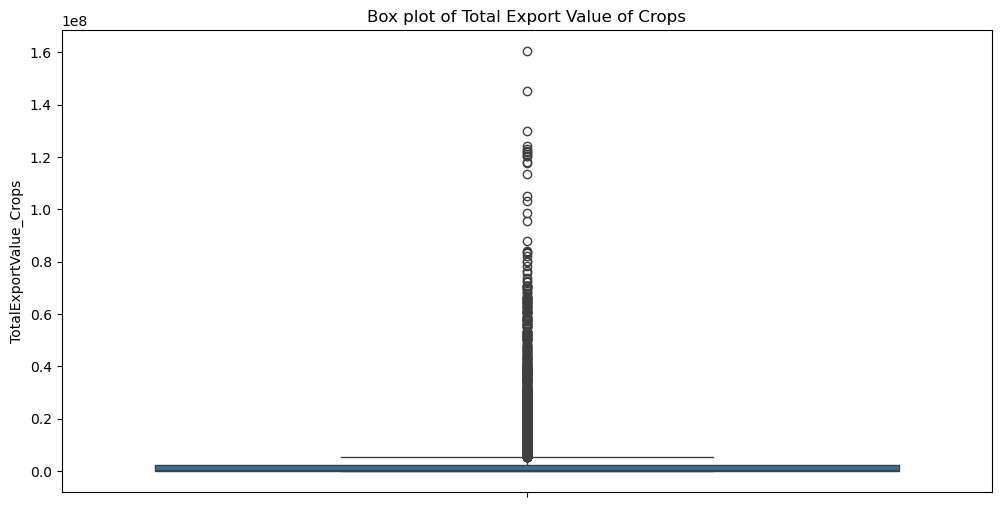

In [57]:
# box plot for the total value
plt.figure(figsize=(12, 6))
sns.boxplot(y='TotalExportValue_Crops', data=food_trade_final_df)
plt.title('Box plot of Total Export Value of Crops')
plt.show()

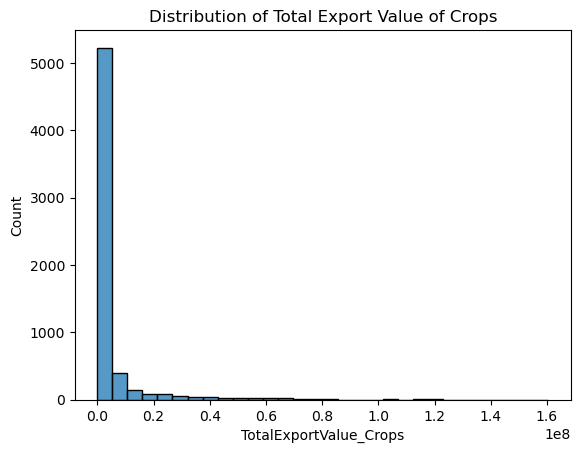

In [58]:
# distribution of total_export_value_crops
sns.histplot(food_trade_final_df['TotalExportValue_Crops'], bins = 30)
plt.title('Distribution of Total Export Value of Crops')
plt.show()

In [59]:
food_trade_final_df.isnull().sum()

Area                          0
Year                          0
TotalExportValue_Crops        0
TotalImportValue_Crops        0
TotalExportValue_Livestock    0
TotalImportValue_Livestock    0
dtype: int64

In [60]:
# save to a csv
food_trade_final_df.to_csv('food_trade_final_df.csv', index=False)

## Extracting the Features

### Emissions Data Set

In [61]:
emis_df.shape

(28910, 17)

In [62]:
emis_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,GCE,Emissions from Crops,4,Afghanistan,72430,Crops total (Emissions N2O),F1712,All Crops,2000,2000,3050,FAO TIER 1,kt,0.7056,E,Estimated value,NaN
1,GCE,Emissions from Crops,4,Afghanistan,72440,Crops total (Emissions CH4),F1712,All Crops,2000,2000,3050,FAO TIER 1,kt,20.8471,E,Estimated value,NaN
2,GCE,Emissions from Crops,4,Afghanistan,72430,Crops total (Emissions N2O),F1712,All Crops,2001,2001,3050,FAO TIER 1,kt,0.7054,E,Estimated value,NaN
3,GCE,Emissions from Crops,4,Afghanistan,72440,Crops total (Emissions CH4),F1712,All Crops,2001,2001,3050,FAO TIER 1,kt,19.2605,E,Estimated value,NaN
4,GCE,Emissions from Crops,4,Afghanistan,72430,Crops total (Emissions N2O),F1712,All Crops,2002,2002,3050,FAO TIER 1,kt,1.0656,E,Estimated value,NaN


In [63]:
emis_df.describe()

,Area Code (M49),Element Code,Year Code,Year,Source Code,Value,Note
count,28910.000000,28910.000000,28910.000000,28910.000000,28910.0,28910.000000,0.0
mean,432.519543,26168.457281,2010.522414,2010.522414,3050.0,636.696462,NaN
std,252.127600,29584.659513,6.342396,6.342396,0.0,6379.076614,NaN
min,4.000000,7230.000000,2000.000000,2000.000000,3050.0,0.000000,NaN
25%,214.000000,7230.000000,2005.000000,2005.000000,3050.0,0.000000,NaN
50%,428.000000,7273.000000,2011.000000,2011.000000,3050.0,0.021350,NaN
75%,646.000000,72430.000000,2016.000000,2016.000000,3050.0,3.655375,NaN
max,894.000000,72440.000000,2021.000000,2021.000000,3050.0,226389.853200,NaN


In [64]:
emis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28910 entries, 0 to 28909
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       28910 non-null  object 
 1   Domain            28910 non-null  object 
 2   Area Code (M49)   28910 non-null  int64  
 3   Area              28910 non-null  object 
 4   Element Code      28910 non-null  int64  
 5   Element           28910 non-null  object 
 6   Item Code (CPC)   28910 non-null  object 
 7   Item              28910 non-null  object 
 8   Year Code         28910 non-null  int64  
 9   Year              28910 non-null  int64  
 10  Source Code       28910 non-null  int64  
 11  Source            28910 non-null  object 
 12  Unit              28910 non-null  object 
 13  Value             28910 non-null  float64
 14  Flag              28910 non-null  object 
 15  Flag Description  28910 non-null  object 
 16  Note              0 non-null      float6

In [65]:
# check null values in the dataframe
emis_df.isnull().sum()

Domain Code             0
Domain                  0
Area Code (M49)         0
Area                    0
Element Code            0
Element                 0
Item Code (CPC)         0
Item                    0
Year Code               0
Year                    0
Source Code             0
Source                  0
Unit                    0
Value                   0
Flag                    0
Flag Description        0
Note                28910
dtype: int64

In [66]:
# checking for 0 values 
emis_df.eq(0).sum()

Domain Code             0
Domain                  0
Area Code (M49)         0
Area                    0
Element Code            0
Element                 0
Item Code (CPC)         0
Item                    0
Year Code               0
Year                    0
Source Code             0
Source                  0
Unit                    0
Value               11996
Flag                    0
Flag Description        0
Note                    0
dtype: int64

In [67]:
emis_pivot_df = emis_df.pivot_table(
    index=['Area', 'Year'], 
    columns=['Element', 'Item'], 
    values='Value', 
    aggfunc='sum'
)

In [68]:
emis_pivot_df.reset_index(inplace=True)

In [69]:
emis_pivot_df.head()

Element         Area  Year Crops total (Emissions CH4)  \
Item                                         All Crops   
0        Afghanistan  2000                     20.8471   
1        Afghanistan  2001                     19.2605   
2        Afghanistan  2002                     21.2553   
3        Afghanistan  2003                     23.7017   
4        Afghanistan  2004                     30.3089   

Element Crops total (Emissions N2O)        Emissions (CO2)  \
Item                      All Crops Cropland organic soils   
0                            0.7056                    0.0   
1                            0.7054                    0.0   
2                            1.0656                    0.0   
3                            1.3117                    0.0   
4                            1.0856                    0.0   

Element                                Emissions (N2O)                          
Item    Grassland organic soils Cropland organic soils Grassland organic soils  
0                           0.0                    0.0                     0.0  
1                           0.0                    0.0                     0.0  
2                           0.0                    0.0                     0.0  
3                           0.0                    0.0                     0.0  
4                           0.0                    0.0                     0.0

In [70]:
emis_pivot_df.columns

MultiIndex([(                       'Area',                        ''),
            (                       'Year',                        ''),
            ('Crops total (Emissions CH4)',               'All Crops'),
            ('Crops total (Emissions N2O)',               'All Crops'),
            (            'Emissions (CO2)',  'Cropland organic soils'),
            (            'Emissions (CO2)', 'Grassland organic soils'),
            (            'Emissions (N2O)',  'Cropland organic soils'),
            (            'Emissions (N2O)', 'Grassland organic soils')],
           names=['Element', 'Item'])

In [71]:
emis_pivot_df.shape

(5130, 8)

In [72]:
emis_pivot_df.isnull().sum()

Element                      Item                   
Area                                                      0
Year                                                      0
Crops total (Emissions CH4)  All Crops                  968
Crops total (Emissions N2O)  All Crops                  902
Emissions (CO2)              Cropland organic soils       0
                             Grassland organic soils      0
Emissions (N2O)              Cropland organic soils       0
                             Grassland organic soils      0
dtype: int64

In [73]:
emis_pivot_df.eq(0).sum()

Element                      Item                   
Area                                                       0
Year                                                       0
Crops total (Emissions CH4)  All Crops                   194
Crops total (Emissions N2O)  All Crops                   254
Emissions (CO2)              Cropland organic soils     2869
                             Grassland organic soils    2864
Emissions (N2O)              Cropland organic soils     2884
                             Grassland organic soils    2931
dtype: int64

In [74]:
# Flatten the MultiIndex in columns
emis_pivot_df.columns = [' '.join(col).strip() if col[1] else col[0] for col in emis_pivot_df.columns.values]

# Display the modified DataFrame to confirm changes
emis_pivot_df.head(), emis_pivot_df.columns

(          Area  Year  Crops total (Emissions CH4) All Crops  \
 0  Afghanistan  2000                                20.8471   
 1  Afghanistan  2001                                19.2605   
 2  Afghanistan  2002                                21.2553   
 3  Afghanistan  2003                                23.7017   
 4  Afghanistan  2004                                30.3089   
 
    Crops total (Emissions N2O) All Crops  \
 0                                 0.7056   
 1                                 0.7054   
 2                                 1.0656   
 3                                 1.3117   
 4                                 1.0856   
 
    Emissions (CO2) Cropland organic soils  \
 0                                     0.0   
 1                                     0.0   
 2                                     0.0   
 3                                     0.0   
 4                                     0.0   
 
    Emissions (CO2) Grassland organic soils  \
 0               

In [75]:
emis_pivot_all_crops_df = emis_pivot_df[['Area', 'Year', 'Crops total (Emissions CH4) All Crops', 'Crops total (Emissions N2O) All Crops']]

In [76]:
emis_pivot_all_crops_df.head()

,Area,Year,Crops total (Emissions CH4) All Crops,Crops total (Emissions N2O) All Crops
0,Afghanistan,2000,20.8471,0.7056
1,Afghanistan,2001,19.2605,0.7054
2,Afghanistan,2002,21.2553,1.0656
3,Afghanistan,2003,23.7017,1.3117
4,Afghanistan,2004,30.3089,1.0856


In [77]:
emis_pivot_all_crops_df.shape

(5130, 4)

In [78]:
emis_pivot_all_crops_df.isnull().sum()

Area                                       0
Year                                       0
Crops total (Emissions CH4) All Crops    968
Crops total (Emissions N2O) All Crops    902
dtype: int64

In [79]:
emis_pivot_all_crops_df.eq(0).sum()

Area                                       0
Year                                       0
Crops total (Emissions CH4) All Crops    194
Crops total (Emissions N2O) All Crops    254
dtype: int64

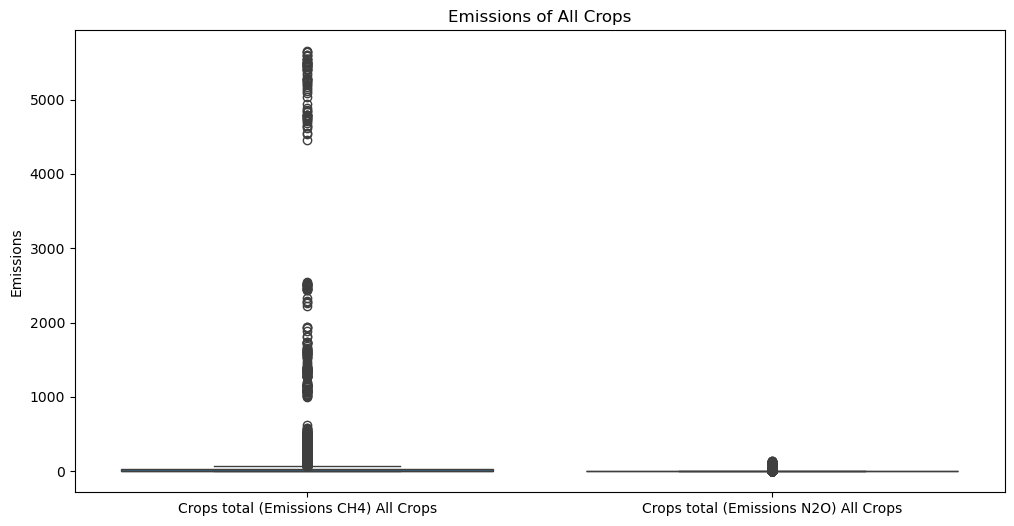

In [80]:
# plot the box plots for the three variables
plt.figure(figsize=(12, 6))
sns.boxplot(data=emis_pivot_all_crops_df[['Crops total (Emissions CH4) All Crops', 'Crops total (Emissions N2O) All Crops']])
plt.title('Emissions of All Crops')
plt.ylabel('Emissions')
plt.show()

In [81]:
emis_pivot_all_crops_df.describe()

,Year,Crops total (Emissions CH4) All Crops,Crops total (Emissions N2O) All Crops
count,5130.000000,4162.000000,4228.000000
mean,2010.521053,159.913930,3.979807
std,6.343028,699.031046,14.884895
min,2000.000000,0.000000,0.000000
25%,2005.000000,0.136250,0.028100
50%,2011.000000,2.364650,0.397000
75%,2016.000000,26.122475,1.466125
max,2021.000000,5649.183400,134.165600


In [82]:
emis_pivot_all_crops_df.shape

(5130, 4)

In [83]:
emis_pivot_all_crops_df.isnull().mean() * 100

Area                                      0.000000
Year                                      0.000000
Crops total (Emissions CH4) All Crops    18.869396
Crops total (Emissions N2O) All Crops    17.582846
dtype: float64

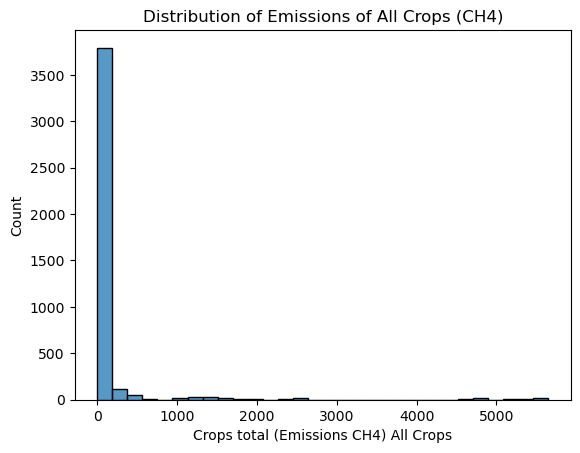

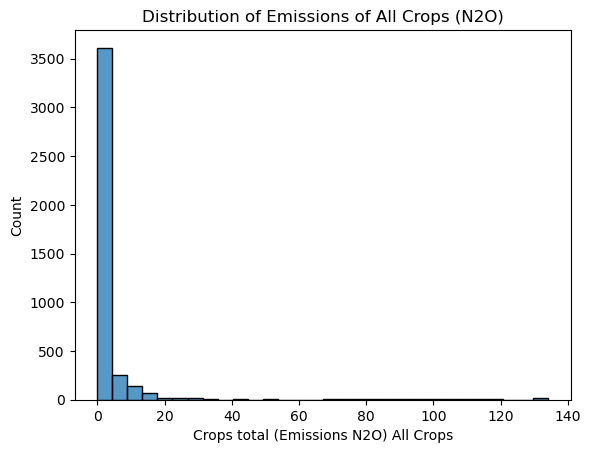

In [84]:
# distribution of all three variables
sns.histplot(emis_pivot_all_crops_df['Crops total (Emissions CH4) All Crops'], bins = 30)
plt.title('Distribution of Emissions of All Crops (CH4)')
plt.show()

sns.histplot(emis_pivot_all_crops_df['Crops total (Emissions N2O) All Crops'], bins = 30)
plt.title('Distribution of Emissions of All Crops (N2O)')
plt.show()


In [85]:
# save to a csv
emis_pivot_all_crops_df.to_csv('emis_pivot_all_crops_df.csv', index=False)

### Consumer Price Index Data Set

In [86]:
cpi_df.shape

(112890, 17)

In [87]:
cpi_df.head()

,Domain Code,Domain,Area Code (M49),Area,Year Code,Year,Item Code,Item,Months Code,Months,Element Code,Element,Unit,Value,Flag,Flag Description,Note
0,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,6125,Value,NaN,24.356332,I,Imputed value,base year is 2015
1,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7002,February,6125,Value,NaN,23.636242,I,Imputed value,base year is 2015
2,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7003,March,6125,Value,NaN,23.485345,I,Imputed value,base year is 2015
3,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7004,April,6125,Value,NaN,24.767194,I,Imputed value,base year is 2015
4,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7005,May,6125,Value,NaN,25.956912,I,Imputed value,base year is 2015


In [88]:
cpi_df.describe()

,Area Code (M49),Year Code,Year,Item Code,Months Code,Element Code,Value
count,112890.000000,112890.000000,112890.000000,112890.000000,112890.000000,112890.000000,1.128900e+05
mean,424.738719,2011.649588,2011.649588,23013.489211,7006.451448,6123.043157,2.059421e+08
std,249.672423,6.716990,6.716990,0.499886,3.437632,1.999543,1.683090e+10
min,4.000000,2000.000000,2000.000000,23013.000000,7001.000000,6121.000000,-2.498299e+01
25%,212.000000,2006.000000,2006.000000,23013.000000,7003.000000,6121.000000,4.245692e+00
50%,426.000000,2012.000000,2012.000000,23013.000000,7006.000000,6125.000000,3.087651e+01
75%,638.000000,2017.000000,2017.000000,23014.000000,7009.000000,6125.000000,9.252795e+01
max,894.000000,2023.000000,2023.000000,23014.000000,7012.000000,6125.000000,2.235770e+12


In [89]:
cpi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112890 entries, 0 to 112889
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Domain Code       112890 non-null  object 
 1   Domain            112890 non-null  object 
 2   Area Code (M49)   112890 non-null  int64  
 3   Area              112890 non-null  object 
 4   Year Code         112890 non-null  int64  
 5   Year              112890 non-null  int64  
 6   Item Code         112890 non-null  int64  
 7   Item              112890 non-null  object 
 8   Months Code       112890 non-null  int64  
 9   Months            112890 non-null  object 
 10  Element Code      112890 non-null  int64  
 11  Element           112890 non-null  object 
 12  Unit              55227 non-null   object 
 13  Value             112890 non-null  float64
 14  Flag              112890 non-null  object 
 15  Flag Description  112890 non-null  object 
 16  Note              57

In [90]:
cpi_df.isnull().sum()

Domain Code             0
Domain                  0
Area Code (M49)         0
Area                    0
Year Code               0
Year                    0
Item Code               0
Item                    0
Months Code             0
Months                  0
Element Code            0
Element                 0
Unit                57663
Value                   0
Flag                    0
Flag Description        0
Note                55227
dtype: int64

In [91]:
cpi_df.eq(0).sum()

Domain Code           0
Domain                0
Area Code (M49)       0
Area                  0
Year Code             0
Year                  0
Item Code             0
Item                  0
Months Code           0
Months                0
Element Code          0
Element               0
Unit                  0
Value               110
Flag                  0
Flag Description      0
Note                  0
dtype: int64

In [92]:
# Grouping data by area and year, then listing all months present for each group
months_per_year_area = cpi_df.groupby(['Area', 'Year'])['Months'].unique()

# Check for completeness of months in each group
months_full_set = set(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
missing_months = months_per_year_area.apply(lambda x: months_full_set - set(x))

# Filter out those that have all months
missing_months = missing_months[missing_months != set()]

missing_months.head(), missing_months.size


(Area         Year
 Afghanistan  2023    {November, October, December}
 Albania      2023    {November, October, December}
 Algeria      2023    {November, October, December}
 Andorra      2023    {November, October, December}
 Angola       2023    {November, October, December}
 Name: Months, dtype: object,
 203)

In [93]:
# Check if the missing months are only associated with the year 2023
missing_months_2023_only = all(missing_months.index.get_level_values('Year') == 2023)
missing_months_2023_only


True

In [94]:
cpi_df.describe()

,Area Code (M49),Year Code,Year,Item Code,Months Code,Element Code,Value
count,112890.000000,112890.000000,112890.000000,112890.000000,112890.000000,112890.000000,1.128900e+05
mean,424.738719,2011.649588,2011.649588,23013.489211,7006.451448,6123.043157,2.059421e+08
std,249.672423,6.716990,6.716990,0.499886,3.437632,1.999543,1.683090e+10
min,4.000000,2000.000000,2000.000000,23013.000000,7001.000000,6121.000000,-2.498299e+01
25%,212.000000,2006.000000,2006.000000,23013.000000,7003.000000,6121.000000,4.245692e+00
50%,426.000000,2012.000000,2012.000000,23013.000000,7006.000000,6125.000000,3.087651e+01
75%,638.000000,2017.000000,2017.000000,23014.000000,7009.000000,6125.000000,9.252795e+01
max,894.000000,2023.000000,2023.000000,23014.000000,7012.000000,6125.000000,2.235770e+12


In [95]:
# Pivot the data to get items as columns and calculate the mean value for each area and year
cpi_pivot_df = cpi_df.pivot_table(index=['Area', 'Year'], columns='Item', values='Value', aggfunc='mean')

# Reset index to make 'Area' and 'Year' normal columns again
cpi_pivot_df.reset_index(inplace=True)
cpi_pivot_df.head()

Item,Area,Year,"Consumer Prices, Food Indices (2015 = 100)",Food price inflation
0,Afghanistan,2000,26.629848,NaN
1,Afghanistan,2001,29.893548,12.780692
2,Afghanistan,2002,35.344892,18.254516
3,Afghanistan,2003,40.203113,14.102244
4,Afghanistan,2004,45.840561,14.072172


In [96]:
cpi_pivot_df.isnull().sum()

Item
Area                                            0
Year                                            0
Consumer Prices, Food Indices (2015 = 100)      0
Food price inflation                          203
dtype: int64

In [97]:
cpi_pivot_df.eq(0).sum()

Item
Area                                          0
Year                                          0
Consumer Prices, Food Indices (2015 = 100)    0
Food price inflation                          0
dtype: int64

In [98]:
cpi_pivot_df.shape

(4856, 4)

In [99]:
cpi_pivot_df.describe()

Item,Year,"Consumer Prices, Food Indices (2015 = 100)",Food price inflation
count,4856.000000,4.856000e+03,4653.000000
mean,2011.526359,4.903050e+08,48.209311
std,6.917770,2.630764e+10,2178.552592
min,2000.000000,6.905505e-01,-18.127214
25%,2006.000000,6.753918e+01,1.733527
50%,2012.000000,9.169095e+01,4.166858
75%,2018.000000,1.037445e+02,8.734102
max,2023.000000,1.774083e+12,143491.554426


In [100]:
cpi_pivot_df.columns

Index(['Area', 'Year', 'Consumer Prices, Food Indices (2015 = 100)',
       'Food price inflation'],
      dtype='object', name='Item')

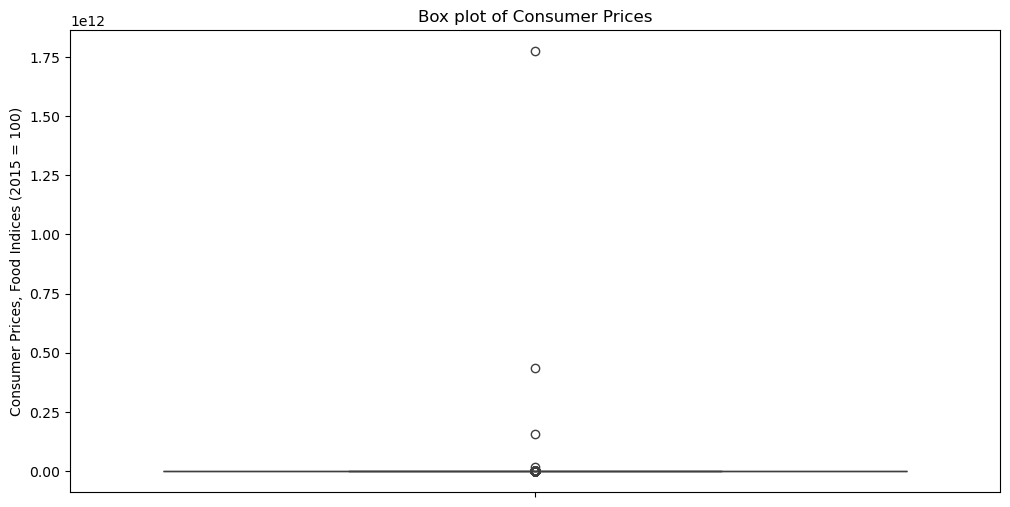

In [101]:
# box plot for consumer prices
plt.figure(figsize=(12, 6))
sns.boxplot(y='Consumer Prices, Food Indices (2015 = 100)', data=cpi_pivot_df)
plt.title('Box plot of Consumer Prices')
plt.show()

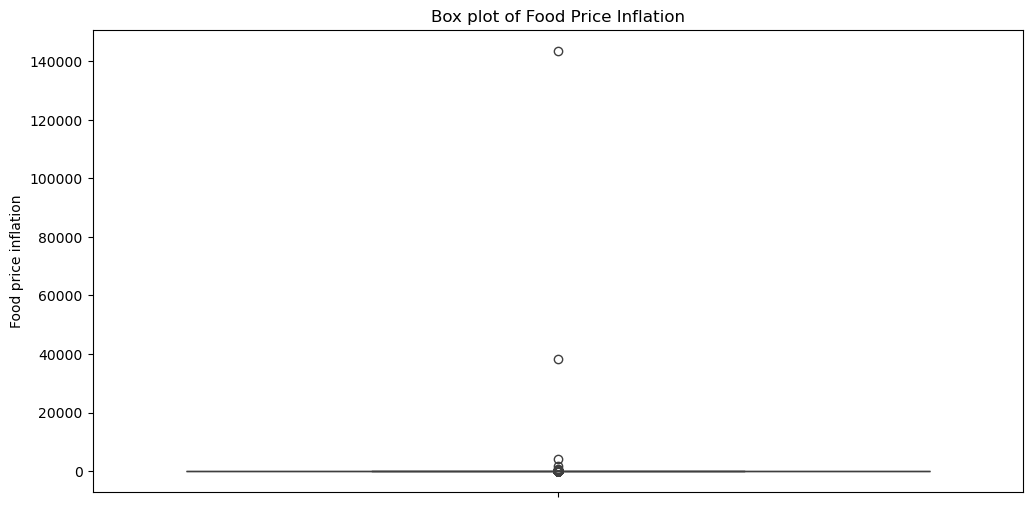

In [102]:
# box plot for food price inflation
plt.figure(figsize=(12, 6))
sns.boxplot(y='Food price inflation', data=cpi_pivot_df)
plt.title('Box plot of Food Price Inflation')
plt.show()

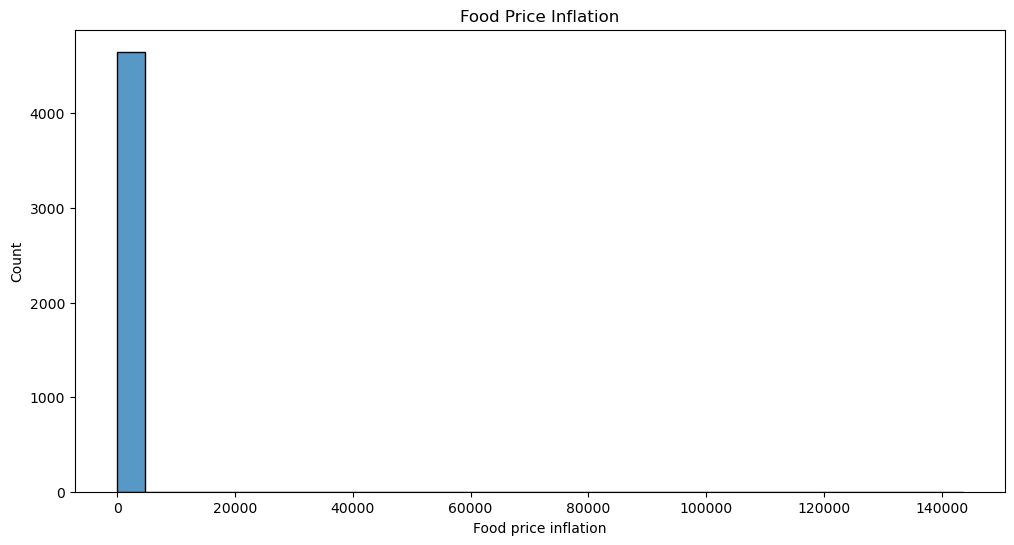

In [103]:
# plot the distribution for Consumer Prices
plt.figure(figsize=(12, 6))
sns.histplot(cpi_pivot_df['Food price inflation'], bins=30)
plt.title('Food Price Inflation')
plt.show()

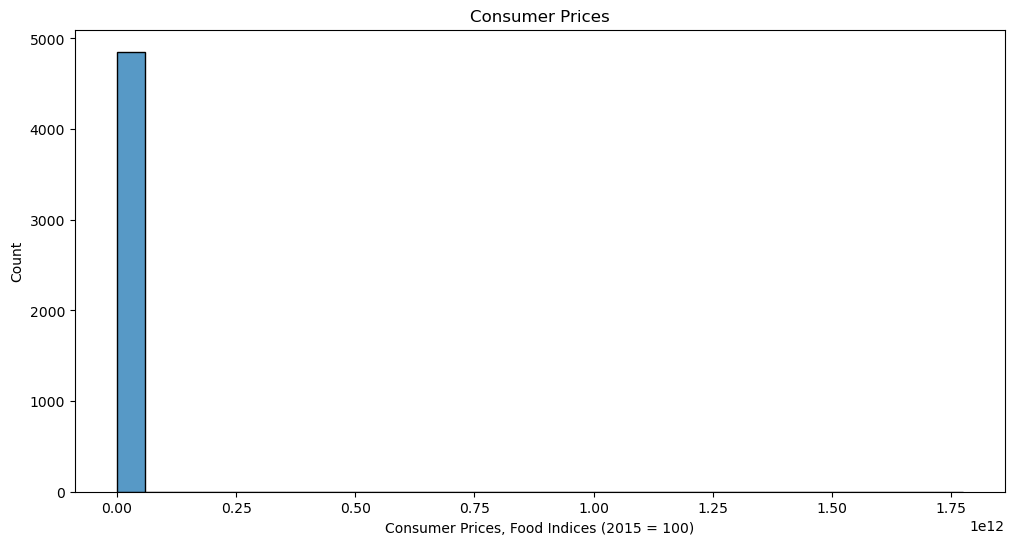

In [104]:
# plot the distribution for Consumer Prices
plt.figure(figsize=(12, 6))
sns.histplot(cpi_pivot_df['Consumer Prices, Food Indices (2015 = 100)'], bins=30)
plt.title('Consumer Prices')
plt.show()

In [105]:
# save to a csv
cpi_pivot_df.to_csv('cpi_final_df.csv', index=False)

### Employment Data Set

In [106]:
employ_df.shape

(5917, 19)

In [107]:
employ_df.head()

,Domain Code,Domain,Area Code (M49),Area,Indicator Code,Indicator,Sex Code,Sex,Year Code,Year,Element Code,Element,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,OEA,Employment Indicators: Agriculture,4,Afghanistan,21150,Mean weekly hours actually worked per employed...,1,Total,2014,2014,6173,Value,3021,Household income and expenditure survey,No,31.68,X,Figure from international organizations,Job coverage: Main job currently held Reposito...
1,OEA,Employment Indicators: Agriculture,4,Afghanistan,21150,Mean weekly hours actually worked per employed...,1,Total,2017,2017,6173,Value,3021,Household income and expenditure survey,No,29.66,X,Figure from international organizations,Job coverage: Main job currently held Reposito...
2,OEA,Employment Indicators: Agriculture,4,Afghanistan,21144,"Employment in agriculture, forestry and fishin...",1,Total,2000,2000,6199,Value,3043,ILO - ILO Modelled Estimates,1000 No,2765.95,X,Figure from international organizations,NaN
3,OEA,Employment Indicators: Agriculture,4,Afghanistan,21144,"Employment in agriculture, forestry and fishin...",1,Total,2001,2001,6199,Value,3043,ILO - ILO Modelled Estimates,1000 No,2805.54,X,Figure from international organizations,NaN
4,OEA,Employment Indicators: Agriculture,4,Afghanistan,21144,"Employment in agriculture, forestry and fishin...",1,Total,2002,2002,6199,Value,3043,ILO - ILO Modelled Estimates,1000 No,2897.51,X,Figure from international organizations,NaN


In [108]:
employ_df.describe()

,Area Code (M49),Indicator Code,Sex Code,Year Code,Year,Element Code,Source Code,Value
count,5917.000000,5917.000000,5917.0,5917.000000,5917.000000,5917.000000,5917.000000,5917.000000
mean,427.420145,21145.763394,1.0,2010.890992,2010.890992,6191.358628,3037.136049,4536.367847
std,250.847292,2.733508,0.0,6.270884,6.270884,11.845202,9.126779,27086.237113
min,4.000000,21144.000000,1.0,2000.000000,2000.000000,6173.000000,3018.000000,0.170000
25%,208.000000,21144.000000,1.0,2006.000000,2006.000000,6173.000000,3023.000000,39.100000
50%,418.000000,21144.000000,1.0,2011.000000,2011.000000,6199.000000,3043.000000,126.540000
75%,642.000000,21150.000000,1.0,2016.000000,2016.000000,6199.000000,3043.000000,1386.380000
max,894.000000,21150.000000,1.0,2022.000000,2022.000000,6199.000000,3043.000000,358919.780000


In [109]:
employ_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5917 entries, 0 to 5916
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       5917 non-null   object 
 1   Domain            5917 non-null   object 
 2   Area Code (M49)   5917 non-null   int64  
 3   Area              5917 non-null   object 
 4   Indicator Code    5917 non-null   int64  
 5   Indicator         5917 non-null   object 
 6   Sex Code          5917 non-null   int64  
 7   Sex               5917 non-null   object 
 8   Year Code         5917 non-null   int64  
 9   Year              5917 non-null   int64  
 10  Element Code      5917 non-null   int64  
 11  Element           5917 non-null   object 
 12  Source Code       5917 non-null   int64  
 13  Source            5917 non-null   object 
 14  Unit              5917 non-null   object 
 15  Value             5917 non-null   float64
 16  Flag              5917 non-null   object 


In [110]:
# checking for null values in the Value column
employ_df['Value'].isnull().sum()

0

In [111]:
# checking for 0 values in the Value column
employ_df['Value'].eq(0).sum()

0

In [112]:
# Filter data based on Indicator
hours_data = employ_df[employ_df['Indicator'].str.contains("Mean weekly hours")]
employment_data = employ_df[employ_df['Indicator'].str.contains("Employment in agriculture")]

# Rename the 'Value' column to more descriptive names
hours_data = hours_data.rename(columns={'Value': 'Mean Weekly Hours'})
employment_data = employment_data.rename(columns={'Value': 'Employment'})

# Select necessary columns
hours_data = hours_data[['Area', 'Year', 'Mean Weekly Hours']]
employment_data = employment_data[['Area', 'Year', 'Employment']]

# Merge the dataframes on 'Area' and 'Year'
combined_data = pd.merge(hours_data, employment_data, on=['Area', 'Year'], how='outer')

# Check the first few rows to ensure accuracy
combined_data.head()

,Area,Year,Mean Weekly Hours,Employment
0,Afghanistan,2000,NaN,2765.95
1,Afghanistan,2001,NaN,2805.54
2,Afghanistan,2002,NaN,2897.51
3,Afghanistan,2003,NaN,3093.27
4,Afghanistan,2004,NaN,3212.46


In [113]:
combined_data.shape

(4221, 4)

In [114]:
# Diagnostics to check the overlap in years between 'hours_data' and 'employment_data' for a sample country
sample_country = 'Afghanistan'

# Filter sample data for diagnostics
sample_hours_data = hours_data[hours_data['Area'] == sample_country]
sample_employment_data = employment_data[employment_data['Area'] == sample_country]

# Display unique years for each dataset for the sample country
sample_hours_years = sample_hours_data['Year'].unique()
sample_employment_years = sample_employment_data['Year'].unique()

sample_hours_years, sample_employment_years


(array([2014, 2017, 2020, 2021], dtype=int64),
 array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
        2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
       dtype=int64))

In [115]:
combined_data.isnull().sum()

Area                    0
Year                    0
Mean Weekly Hours    2482
Employment             39
dtype: int64

In [116]:
combined_data.isnull().mean() * 100

Area                  0.000000
Year                  0.000000
Mean Weekly Hours    58.801232
Employment            0.923952
dtype: float64

In [117]:
# Use a left merge to keep all entries from the employment data
employ_adj_df = pd.merge(employment_data, hours_data, on=['Area', 'Year'], how='left')

# Check the first few rows to ensure accuracy
employ_adj_df.head()

,Area,Year,Employment,Mean Weekly Hours
0,Afghanistan,2000,2765.95,NaN
1,Afghanistan,2001,2805.54,NaN
2,Afghanistan,2002,2897.51,NaN
3,Afghanistan,2003,3093.27,NaN
4,Afghanistan,2004,3212.46,NaN


In [118]:
employ_adj_df.shape

(4182, 4)

In [119]:
employ_adj_df.isnull().sum()

Area                    0
Year                    0
Employment              0
Mean Weekly Hours    2482
dtype: int64

In [120]:
employ_adj_df.isnull().mean() * 100

Area                  0.000000
Year                  0.000000
Employment            0.000000
Mean Weekly Hours    59.349593
dtype: float64

In [121]:
employ_final_df = employ_adj_df[['Area', 'Year', 'Employment']]

In [122]:
# change the Employment in Agriculture to Employment_in_Agriculture_Employ
employ_final_df.rename(columns={'Employment': 'employment_agriculture'}, inplace=True)

C:\Users\saqib\AppData\Local\Temp\ipykernel_332252\602349060.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employ_final_df.rename(columns={'Employment': 'employment_agriculture'}, inplace=True)


In [123]:
employ_final_df.head()

,Area,Year,employment_agriculture
0,Afghanistan,2000,2765.95
1,Afghanistan,2001,2805.54
2,Afghanistan,2002,2897.51
3,Afghanistan,2003,3093.27
4,Afghanistan,2004,3212.46


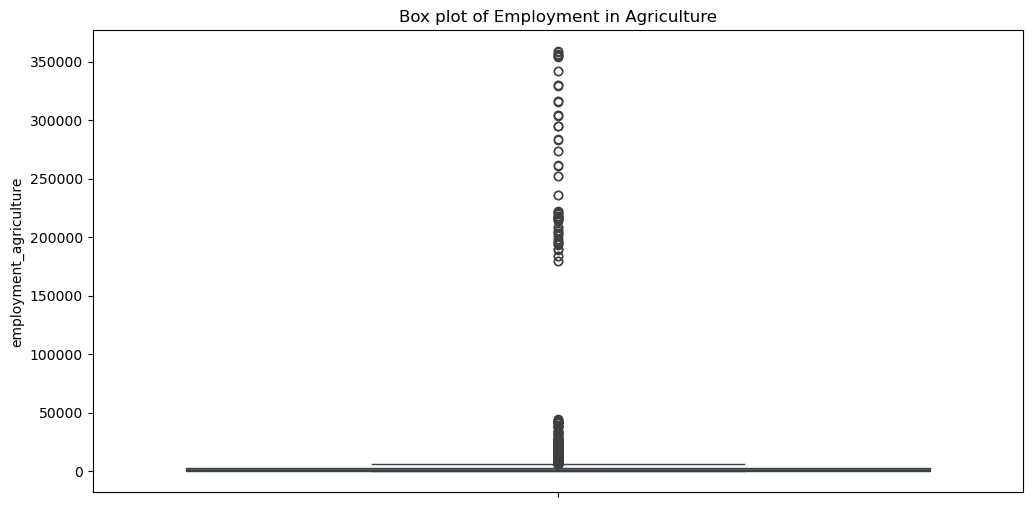

In [124]:
# plot the box plot for Employment_in_Agriculture_Employ
plt.figure(figsize=(12, 6))
sns.boxplot(y='employment_agriculture', data=employ_final_df)
plt.title('Box plot of Employment in Agriculture')
plt.show()

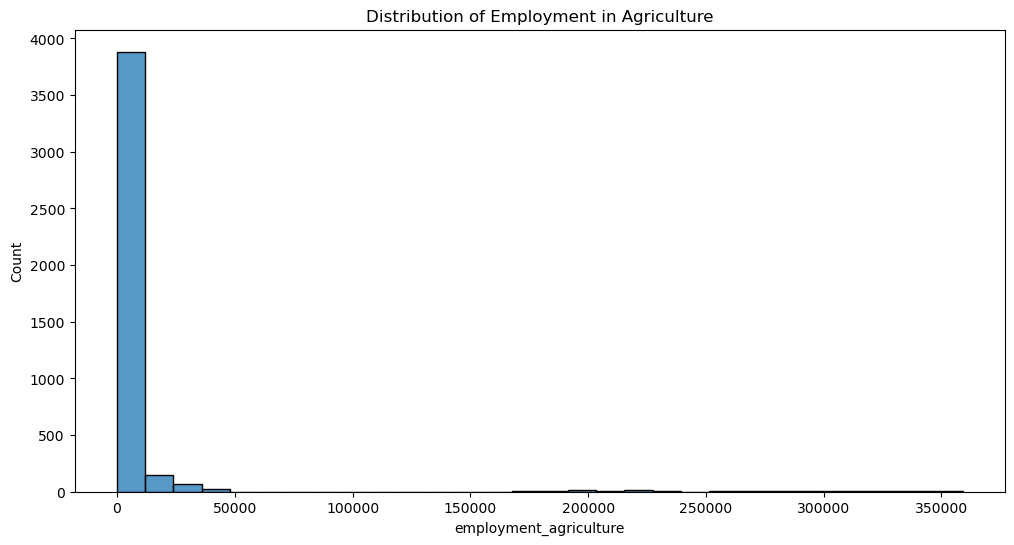

In [125]:
# plot the distribution for Employment in Agriculture
plt.figure(figsize=(12, 6))
sns.histplot(employ_final_df['employment_agriculture'], bins=30)
plt.title('Distribution of Employment in Agriculture')
plt.show()

In [126]:
# save to a csv
employ_final_df.to_csv('employ_final_df.csv', index=False)

### Crops Production Indicator Data Set

In [127]:
crop_prod_df.shape

(41649, 15)

In [128]:
crop_prod_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2000,2000,100 g/ha,8063,A,Official figure,NaN
1,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2001,2001,100 g/ha,10067,A,Official figure,NaN
2,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2002,2002,100 g/ha,16698,A,Official figure,NaN
3,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2003,2003,100 g/ha,14580,A,Official figure,NaN
4,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2004,2004,100 g/ha,13348,A,Official figure,NaN


In [129]:
crop_prod_df.describe()

,Area Code (M49),Element Code,Year Code,Year,Value,Note
count,41649.000000,41649.0,41649.000000,41649.000000,4.164900e+04,0.0
mean,425.491777,5419.0,2010.900478,2010.900478,1.056544e+05,NaN
std,255.597188,0.0,6.614270,6.614270,1.688875e+05,NaN
min,4.000000,5419.0,2000.000000,2000.000000,0.000000e+00,NaN
25%,203.000000,5419.0,2005.000000,2005.000000,8.469000e+03,NaN
50%,417.000000,5419.0,2011.000000,2011.000000,3.828200e+04,NaN
75%,643.000000,5419.0,2017.000000,2017.000000,1.289290e+05,NaN
max,894.000000,5419.0,2022.000000,2022.000000,1.359231e+06,NaN


In [130]:
crop_prod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41649 entries, 0 to 41648
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       41649 non-null  object 
 1   Domain            41649 non-null  object 
 2   Area Code (M49)   41649 non-null  int64  
 3   Area              41649 non-null  object 
 4   Element Code      41649 non-null  int64  
 5   Element           41649 non-null  object 
 6   Item Code (CPC)   41649 non-null  object 
 7   Item              41649 non-null  object 
 8   Year Code         41649 non-null  int64  
 9   Year              41649 non-null  int64  
 10  Unit              41649 non-null  object 
 11  Value             41649 non-null  int64  
 12  Flag              41649 non-null  object 
 13  Flag Description  41649 non-null  object 
 14  Note              0 non-null      float64
dtypes: float64(1), int64(5), object(9)
memory usage: 4.8+ MB


In [131]:
# check null values in the dataframe
crop_prod_df.isnull().sum()

Domain Code             0
Domain                  0
Area Code (M49)         0
Area                    0
Element Code            0
Element                 0
Item Code (CPC)         0
Item                    0
Year Code               0
Year                    0
Unit                    0
Value                   0
Flag                    0
Flag Description        0
Note                41649
dtype: int64

In [132]:
# check 0 values in the dataframe
crop_prod_df.eq(0).sum()

Domain Code          0
Domain               0
Area Code (M49)      0
Area                 0
Element Code         0
Element              0
Item Code (CPC)      0
Item                 0
Year Code            0
Year                 0
Unit                 0
Value               10
Flag                 0
Flag Description     0
Note                 0
dtype: int64

In [133]:
crop_prod_sep_df = crop_prod_df.pivot_table(values='Value', index = ['Area', 'Year'], columns='Item', fill_value=None).reset_index()

In [134]:
crop_prod_sep_df.head()

Item,Area,Year,"Cereals, primary","Citrus Fruit, Total","Fibre Crops, Fibre Equivalent",Fruit Primary,"Oilcrops, Cake Equivalent","Oilcrops, Oil Equivalent","Pulses, Total","Roots and Tubers, Total",Sugar Crops Primary,"Treenuts, Total",Vegetables Primary
0,Afghanistan,2000,8063.0,71245.0,3990.0,76730.0,3833.0,2231.0,10203.0,167857.0,177273.0,16378.0,124154.0
1,Afghanistan,2001,10067.0,71417.0,3990.0,80268.0,3829.0,2217.0,10262.0,167857.0,177273.0,16190.0,124344.0
2,Afghanistan,2002,16698.0,71477.0,3990.0,80174.0,3818.0,2202.0,10317.0,164286.0,177273.0,18370.0,123884.0
3,Afghanistan,2003,14580.0,73423.0,3850.0,82792.0,3844.0,2532.0,10712.0,166667.0,174286.0,16328.0,124287.0
4,Afghanistan,2004,13348.0,78025.0,3843.0,79157.0,3951.0,2716.0,10769.0,176471.0,162500.0,12909.0,132255.0


In [135]:
# checking NaN values in the new dataframe
crop_prod_sep_df.isnull().sum()

Item
Area                                0
Year                                0
Cereals, primary                  426
Citrus Fruit, Total              1410
Fibre Crops, Fibre Equivalent    1888
Fruit Primary                      69
Oilcrops, Cake Equivalent         419
Oilcrops, Oil Equivalent          358
Pulses, Total                     637
Roots and Tubers, Total            92
Sugar Crops Primary              1450
Treenuts, Total                  1962
Vegetables Primary                 97
dtype: int64

In [136]:
crop_prod_sep_df.shape

(4587, 13)

In [137]:
# checking 0 values in the new dataframe
crop_prod_sep_df.eq(0).sum()

Item
Area                             0
Year                             0
Cereals, primary                 0
Citrus Fruit, Total              0
Fibre Crops, Fibre Equivalent    5
Fruit Primary                    0
Oilcrops, Cake Equivalent        0
Oilcrops, Oil Equivalent         0
Pulses, Total                    0
Roots and Tubers, Total          0
Sugar Crops Primary              0
Treenuts, Total                  5
Vegetables Primary               0
dtype: int64

In [138]:
# Add a new column 'Total Value' that sums up all item values for each row
crop_prod_sep_df['Total Value'] = crop_prod_sep_df.drop(['Area', 'Year'], axis=1).sum(axis=1)

In [139]:
crop_prod_sep_df.head()

Item,Area,Year,"Cereals, primary","Citrus Fruit, Total","Fibre Crops, Fibre Equivalent",Fruit Primary,"Oilcrops, Cake Equivalent","Oilcrops, Oil Equivalent","Pulses, Total","Roots and Tubers, Total",Sugar Crops Primary,"Treenuts, Total",Vegetables Primary,Total Value
0,Afghanistan,2000,8063.0,71245.0,3990.0,76730.0,3833.0,2231.0,10203.0,167857.0,177273.0,16378.0,124154.0,661957.0
1,Afghanistan,2001,10067.0,71417.0,3990.0,80268.0,3829.0,2217.0,10262.0,167857.0,177273.0,16190.0,124344.0,667714.0
2,Afghanistan,2002,16698.0,71477.0,3990.0,80174.0,3818.0,2202.0,10317.0,164286.0,177273.0,18370.0,123884.0,672489.0
3,Afghanistan,2003,14580.0,73423.0,3850.0,82792.0,3844.0,2532.0,10712.0,166667.0,174286.0,16328.0,124287.0,673301.0
4,Afghanistan,2004,13348.0,78025.0,3843.0,79157.0,3951.0,2716.0,10769.0,176471.0,162500.0,12909.0,132255.0,675944.0


In [140]:
crop_prod_final = crop_prod_sep_df[['Area', 'Year', 'Total Value']]

In [141]:
crop_prod_final.shape

(4587, 3)

In [142]:
crop_prod_final.eq(0).sum()

Item
Area           0
Year           0
Total Value    0
dtype: int64

In [143]:
crop_prod_final.isnull().sum()

Item
Area           0
Year           0
Total Value    0
dtype: int64

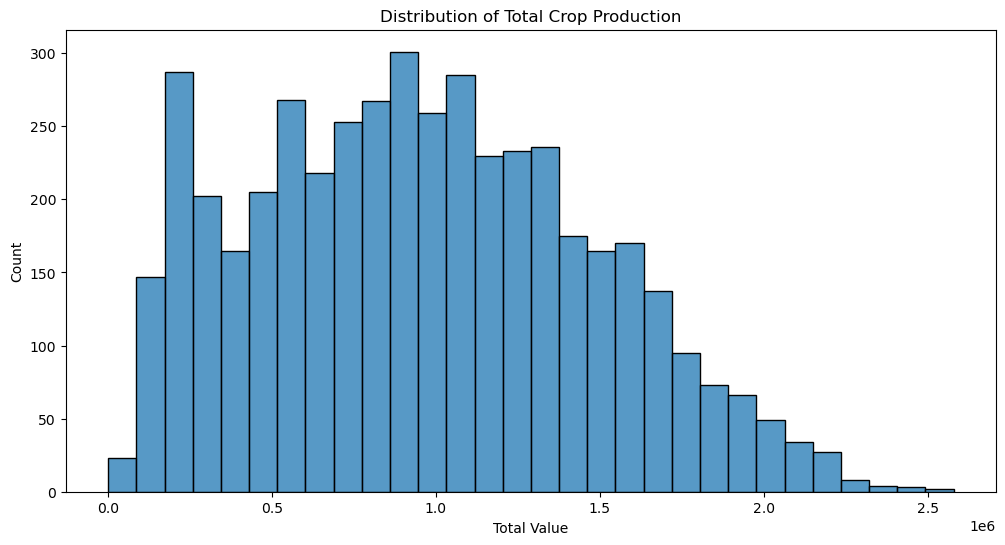

In [144]:
# distribution plot for the final data
plt.figure(figsize=(12, 6))
sns.histplot(crop_prod_final['Total Value'], bins=30)
plt.title('Distribution of Total Crop Production')
plt.show()

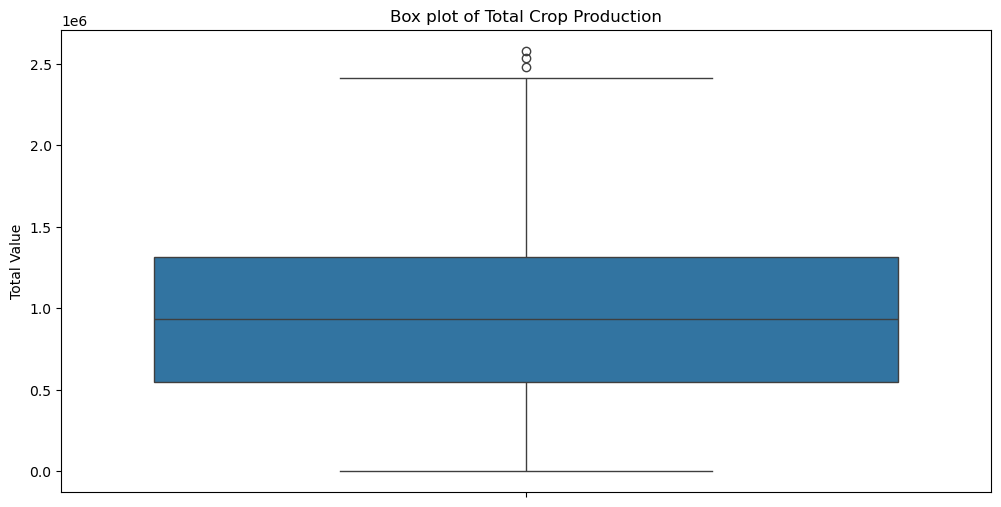

In [145]:
# box plot for the total value
plt.figure(figsize=(12, 6))
sns.boxplot(y='Total Value', data=crop_prod_final)
plt.title('Box plot of Total Crop Production')
plt.show()

In [146]:
# rename the total value to total_yield_crop_prod
crop_prod_final.rename(columns={'Total Value': 'total_yield_crop_prod'}, inplace=True)

C:\Users\saqib\AppData\Local\Temp\ipykernel_332252\1073626429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_prod_final.rename(columns={'Total Value': 'total_yield_crop_prod'}, inplace=True)


In [147]:
crop_prod_final.head()

Item,Area,Year,total_yield_crop_prod
0,Afghanistan,2000,661957.0
1,Afghanistan,2001,667714.0
2,Afghanistan,2002,672489.0
3,Afghanistan,2003,673301.0
4,Afghanistan,2004,675944.0


In [148]:
crop_prod_final.describe()

Item,Year,total_yield_crop_prod
count,4587.000000,4.587000e+03
mean,2010.976673,9.593197e+05
std,6.642259,5.113314e+05
min,2000.000000,1.071000e+03
25%,2005.000000,5.511450e+05
50%,2011.000000,9.361260e+05
75%,2017.000000,1.317705e+06
max,2022.000000,2.579116e+06


In [149]:
# save to a csv
crop_prod_final.to_csv('crop_prod_final.csv', index=False)

### Exchange Rate Data Set

In [150]:
exchange_df.shape

(103276, 16)

In [151]:
exchange_df.head()

,Domain Code,Domain,Area Code (M49),Area,ISO Currency Code (FAO),Currency,Element Code,Element,Year Code,Year,Months Code,Months,Unit,Value,Flag,Flag Description
0,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7001,January,NaN,44.129167,X,Figure from international organizations
1,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7002,February,NaN,44.129167,X,Figure from international organizations
2,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7003,March,NaN,44.129167,X,Figure from international organizations
3,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7004,April,NaN,44.129167,X,Figure from international organizations
4,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7005,May,NaN,44.129167,X,Figure from international organizations


In [152]:
exchange_df.describe()

,Area Code (M49),Year Code,Year,Months Code,Unit,Value
count,103276.000000,103276.000000,103276.000000,103276.000000,0.0,1.032760e+05
mean,428.219887,2002.605959,2002.605959,7006.493329,NaN,7.841324e+05
std,249.825569,12.427199,12.427199,3.450808,NaN,2.176740e+08
min,4.000000,1980.000000,1980.000000,7001.000000,NaN,8.160000e-06
25%,218.000000,1992.000000,1992.000000,7003.000000,NaN,1.508627e+00
50%,426.000000,2003.000000,2003.000000,7006.000000,NaN,7.501877e+00
75%,642.000000,2013.000000,2013.000000,7009.000000,NaN,1.122701e+02
max,894.000000,2023.000000,2023.000000,7012.000000,NaN,6.907838e+10


In [153]:
exchange_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103276 entries, 0 to 103275
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Domain Code              103276 non-null  object 
 1   Domain                   103276 non-null  object 
 2   Area Code (M49)          103276 non-null  int64  
 3   Area                     103276 non-null  object 
 4   ISO Currency Code (FAO)  103276 non-null  object 
 5   Currency                 103276 non-null  object 
 6   Element Code             103276 non-null  object 
 7   Element                  103276 non-null  object 
 8   Year Code                103276 non-null  int64  
 9   Year                     103276 non-null  int64  
 10  Months Code              103276 non-null  int64  
 11  Months                   103276 non-null  object 
 12  Unit                     0 non-null       float64
 13  Value                    103276 non-null  float64
 14  Flag

In [154]:
# check if there are null values in the Value column
exchange_df.isnull().sum()

Domain Code                     0
Domain                          0
Area Code (M49)                 0
Area                            0
ISO Currency Code (FAO)         0
Currency                        0
Element Code                    0
Element                         0
Year Code                       0
Year                            0
Months Code                     0
Months                          0
Unit                       103276
Value                           0
Flag                            0
Flag Description                0
dtype: int64

In [155]:
# check if there are null values in the Value column
exchange_df.eq(0).sum()

Domain Code                0
Domain                     0
Area Code (M49)            0
Area                       0
ISO Currency Code (FAO)    0
Currency                   0
Element Code               0
Element                    0
Year Code                  0
Year                       0
Months Code                0
Months                     0
Unit                       0
Value                      0
Flag                       0
Flag Description           0
dtype: int64

In [156]:
# Create a pivot table to check data availability for each country per year
data_availability_matrix = exchange_df.pivot_table(index='Area', columns='Year', values='Value', aggfunc='count')

# Fill NaN with 0 to indicate no data for that year and convert floats to int (indicating presence of data)
data_availability_matrix = data_availability_matrix.notna().astype(int)

# Show the data availability matrix
data_availability_matrix.head()


Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Area,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
Albania,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Algeria,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Andorra,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Angola,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [157]:
# Checking data availability for all countries across different years
country_year_data = exchange_df.groupby(['Area', 'Year']).size().unstack(fill_value=0)

# Show the summary of data available for each country per year
country_year_data.head(), country_year_data.shape

(Year         1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  ...  \
 Area                                                                     ...   
 Afghanistan    12    12    12    12    12    12    12    12    12    12  ...   
 Albania         0     0     0     0     0     0     0     0     0     0  ...   
 Algeria        12    12    12    12    12    12    12    12    12    12  ...   
 Andorra         0     0     0     0     0     0     0     0     0     0  ...   
 Angola         12    12    12    12    12    12    12    12    12    12  ...   
 
 Year         2014  2015  2016  2017  2018  2019  2020  2021  2022  2023  
 Area                                                                     
 Afghanistan    12    12    12    12    12    12    12     5     0     0  
 Albania        12    12    12    12    12    12    12    12    12    12  
 Algeria        12    12    12    12    12    12    12    12    12    11  
 Andorra        12    12    12    12    12    12    12  

In [158]:
# Checking data availability for all months in each year
month_year_data = exchange_df.groupby(['Year', 'Months']).size().unstack(fill_value=0)

# Show the summary of data available for each month per year
month_year_data.head(), month_year_data.shape

(Months  April  August  December  February  January  July  June  March  May  \
 Year                                                                         
 1980      162     162       162       162      164   162   162    162  162   
 1981      164     164       164       164      164   164   164    164  164   
 1982      165     165       165       165      165   165   165    165  165   
 1983      166     166       166       166      166   166   166    166  166   
 1984      166     166       165       166      166   166   166    166  166   
 
 Months  November  October  September  
 Year                                  
 1980         162      162        162  
 1981         164      164        164  
 1982         165      165        165  
 1983         166      166        166  
 1984         165      166        166  ,
 (44, 12))

In [159]:
# Identify which countries have data for January 1980
january_2020_countries = exchange_df[(exchange_df['Year'] == 2020) & (exchange_df['Months'] == 'January')]['Area'].unique()

# List of all countries in the dataset
all_countries = exchange_df['Area'].unique()

# Find which countries are missing data for January 1980
missing_countries_january_2020 = set(all_countries) - set(january_2020_countries)
missing_countries_january_2020, len(missing_countries_january_2020)


({'Czechoslovakia',
  'Netherlands Antilles (former)',
  'Somalia',
  'Syrian Arab Republic',
  'Turkmenistan',
  'Venezuela (Bolivarian Republic of)',
  'Yugoslav SFR'},
 7)

In [160]:
exchange_final_df = exchange_df.groupby(['Area', 'Year'])['Value'].mean().reset_index()

In [161]:
exchange_final_df.shape

(8639, 3)

In [162]:
exchange_final_df.head()

,Area,Year,Value
0,Afghanistan,1980,44.129167
1,Afghanistan,1981,49.479902
2,Afghanistan,1982,50.599608
3,Afghanistan,1983,50.599608
4,Afghanistan,1984,50.599606


In [163]:
exchange_final_df.isnull().sum()

Area     0
Year     0
Value    0
dtype: int64

In [164]:
exchange_final_df.eq(0).sum()

Area     0
Year     0
Value    0
dtype: int64

In [165]:
# Create a pivot table to check data availability for each country per year
data_availability_matrix2 = exchange_final_df.pivot_table(index='Area', columns='Year', values='Value', aggfunc='count')

# Fill NaN with 0 to indicate no data for that year and convert floats to int (indicating presence of data)
data_availability_matrix2 = data_availability_matrix2.notna().astype(int)

# Show the data availability matrix
data_availability_matrix2.head()

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Area,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
Albania,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Algeria,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Andorra,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Angola,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [166]:
# rename Value column to 'Exchange_Value_Exchange_Rate'
exchange_final_df.rename(columns={'Value': 'Exchange_Value_Exchange_Rate'}, inplace=True)

In [167]:
exchange_final_df.head()

,Area,Year,Exchange_Value_Exchange_Rate
0,Afghanistan,1980,44.129167
1,Afghanistan,1981,49.479902
2,Afghanistan,1982,50.599608
3,Afghanistan,1983,50.599608
4,Afghanistan,1984,50.599606


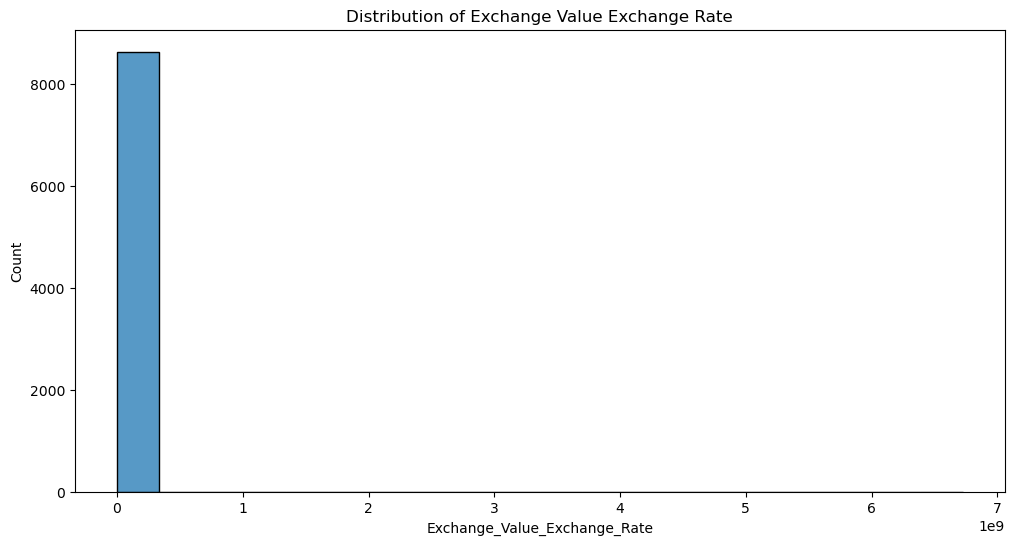

In [168]:
# plot the distribution for the Exchange_value_exchange_rate
plt.figure(figsize=(12, 6))
sns.histplot(exchange_final_df['Exchange_Value_Exchange_Rate'], bins=20)
plt.title('Distribution of Exchange Value Exchange Rate')
plt.show()

In [169]:
# summarize the final data
exchange_final_df.describe()

,Year,Exchange_Value_Exchange_Rate
count,8639.000000,8.639000e+03
mean,2002.591619,7.809742e+05
std,12.448408,7.233271e+07
min,1980.000000,6.452907e-04
25%,1992.000000,1.541914e+00
50%,2003.000000,7.621292e+00
75%,2013.000000,1.137772e+02
max,2023.000000,6.723052e+09


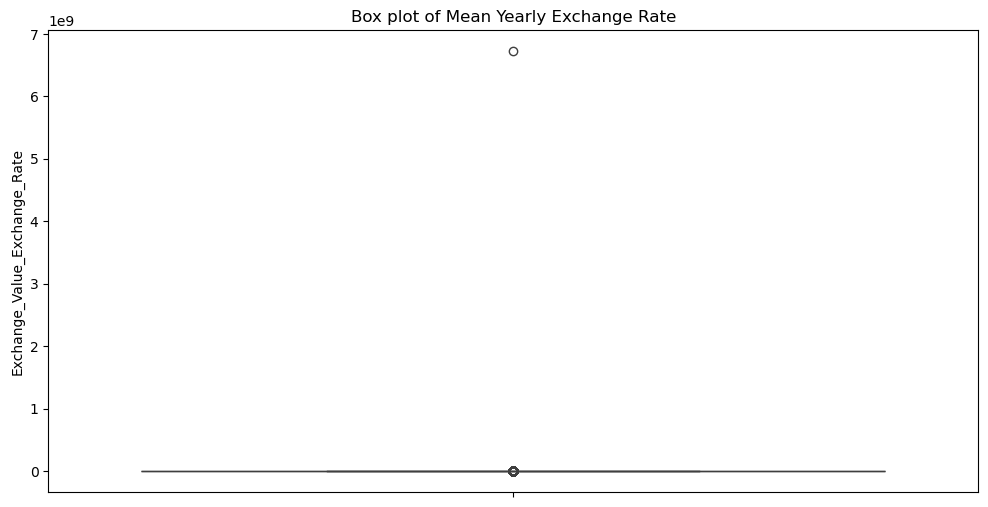

In [170]:
# box plot for the total value
plt.figure(figsize=(12, 6))
sns.boxplot(y='Exchange_Value_Exchange_Rate', data=exchange_final_df)
plt.title('Box plot of Mean Yearly Exchange Rate')
plt.show()

In [171]:
# save to a csv
exchange_final_df.to_csv('exchange_final_df.csv', index=False)

### Fertilizers Use Data Set

In [172]:
fertilizers_df.shape

(17807, 14)

In [173]:
fertilizers_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2002,2002,t,17900.0,I,Imputed value
1,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2003,2003,t,33200.0,I,Imputed value
2,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2004,2004,t,47700.0,I,Imputed value
3,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4001,Urea,2004,2004,t,42300.0,I,Imputed value
4,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4001,Urea,2005,2005,t,20577.0,I,Imputed value


In [174]:
fertilizers_df.describe()

,Area Code (M49),Element Code,Item Code,Year Code,Year,Value
count,17807.000000,17807.0,17807.000000,17807.000000,17807.000000,1.780700e+04
mean,428.095861,5157.0,4013.974224,2011.259224,2011.259224,2.124516e+05
std,252.862476,0.0,9.034514,5.443312,5.443312,1.408350e+06
min,4.000000,5157.0,4001.000000,2002.000000,2002.000000,0.000000e+00
25%,208.000000,5157.0,4004.000000,2007.000000,2007.000000,1.000000e+02
50%,414.000000,5157.0,4016.000000,2011.000000,2011.000000,3.584000e+03
75%,620.000000,5157.0,4022.000000,2016.000000,2016.000000,4.573800e+04
max,894.000000,5157.0,4030.000000,2021.000000,2021.000000,9.621329e+07


In [175]:
fertilizers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17807 entries, 0 to 17806
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       17807 non-null  object 
 1   Domain            17807 non-null  object 
 2   Area Code (M49)   17807 non-null  int64  
 3   Area              17807 non-null  object 
 4   Element Code      17807 non-null  int64  
 5   Element           17807 non-null  object 
 6   Item Code         17807 non-null  int64  
 7   Item              17807 non-null  object 
 8   Year Code         17807 non-null  int64  
 9   Year              17807 non-null  int64  
 10  Unit              17807 non-null  object 
 11  Value             17807 non-null  float64
 12  Flag              17807 non-null  object 
 13  Flag Description  17807 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 1.9+ MB


In [176]:
# Pivot the table again using NaN as the fill value instead of 0
fertilizers_final_df = fertilizers_df.pivot_table(index=['Area', 'Year'], columns='Item', values='Value', fill_value=None)
fertilizers_final_df.reset_index(inplace=True)
fertilizers_final_df.head()

Item,Area,Year,"Ammonia, anhydrous",Ammonium nitrate (AN),Ammonium sulphate,Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate,Diammonium phosphate (DAP),Fertilizers n.e.c.,Monoammonium phosphate (MAP),NPK fertilizers,...,PK compounds,Phosphate rock,Potassium chloride (muriate of potash) (MOP),Potassium nitrate,Potassium sulphate (sulphate of potash) (SOP),Sodium nitrate,Superphosphates above 35%,"Superphosphates, other",Urea,Urea and ammonium nitrate solutions (UAN)
0,Afghanistan,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42300.0,NaN
3,Afghanistan,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20577.0,NaN
4,Afghanistan,2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68253.0,NaN


In [177]:
fertilizers_final_df.shape

(1933, 25)

In [178]:
# check the NaN values in the dataframe
fertilizers_final_df.isnull().sum()

Item
Area                                                                           0
Year                                                                           0
Ammonia, anhydrous                                                          1640
Ammonium nitrate (AN)                                                        808
Ammonium sulphate                                                            617
Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate    1053
Diammonium phosphate (DAP)                                                   727
Fertilizers n.e.c.                                                          1666
Monoammonium phosphate (MAP)                                                1029
NPK fertilizers                                                              452
Other NK compounds                                                          1727
Other NP compounds                                                           916
Other nitrogenous ferti

In [179]:
fertilizers_final_df.isnull().mean() * 100

Item
Area                                                                         0.000000
Year                                                                         0.000000
Ammonia, anhydrous                                                          84.842214
Ammonium nitrate (AN)                                                       41.800310
Ammonium sulphate                                                           31.919296
Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate    54.474909
Diammonium phosphate (DAP)                                                  37.609933
Fertilizers n.e.c.                                                          86.187274
Monoammonium phosphate (MAP)                                                53.233316
NPK fertilizers                                                             23.383342
Other NK compounds                                                          89.342990
Other NP compounds                               

In [180]:
# check how many values are 0 in the dataframe
fertilizers_final_df.eq(0).sum()

Item
Area                                                                          0
Year                                                                          0
Ammonia, anhydrous                                                          182
Ammonium nitrate (AN)                                                        82
Ammonium sulphate                                                            42
Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate     59
Diammonium phosphate (DAP)                                                   85
Fertilizers n.e.c.                                                           67
Monoammonium phosphate (MAP)                                                 79
NPK fertilizers                                                              15
Other NK compounds                                                          109
Other NP compounds                                                           57
Other nitrogenous fertilizers, n.e.

In [181]:
# fertilizers_final_df = fertilizers_final_df.fillna(0)
# fertilizers_final_df.head()

In [182]:
fertilizers_final_df['Total Fertilizer Use'] = fertilizers_final_df.iloc[:, 2:].sum(axis=1)

In [183]:
fertilizers_final_df.head()

Item,Area,Year,"Ammonia, anhydrous",Ammonium nitrate (AN),Ammonium sulphate,Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate,Diammonium phosphate (DAP),Fertilizers n.e.c.,Monoammonium phosphate (MAP),NPK fertilizers,...,Phosphate rock,Potassium chloride (muriate of potash) (MOP),Potassium nitrate,Potassium sulphate (sulphate of potash) (SOP),Sodium nitrate,Superphosphates above 35%,"Superphosphates, other",Urea,Urea and ammonium nitrate solutions (UAN),Total Fertilizer Use
0,Afghanistan,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17900.0
1,Afghanistan,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33200.0
2,Afghanistan,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42300.0,NaN,90000.0
3,Afghanistan,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20577.0,NaN,20577.0
4,Afghanistan,2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68253.0,NaN,68253.0


In [184]:
fertilizers_final_df = fertilizers_final_df[['Area', 'Year', 'Total Fertilizer Use']]

In [185]:
# rename Total Fertilizer Use to total_fertilizer_use_fertilizers
fertilizers_final_df.rename(columns={'Total Fertilizer Use': 'total_fertilizer_use_fertilizers'}, inplace=True)

In [186]:
fertilizers_final_df.head()

Item,Area,Year,total_fertilizer_use_fertilizers
0,Afghanistan,2002,17900.0
1,Afghanistan,2003,33200.0
2,Afghanistan,2004,90000.0
3,Afghanistan,2005,20577.0
4,Afghanistan,2006,68253.0


In [187]:
fertilizers_final_df.shape

(1933, 3)

In [188]:
fertilizers_final_df.isnull().sum()

Item
Area                                0
Year                                0
total_fertilizer_use_fertilizers    0
dtype: int64

In [189]:
fertilizers_final_df.eq(0).sum()

Item
Area                                 0
Year                                 0
total_fertilizer_use_fertilizers    21
dtype: int64

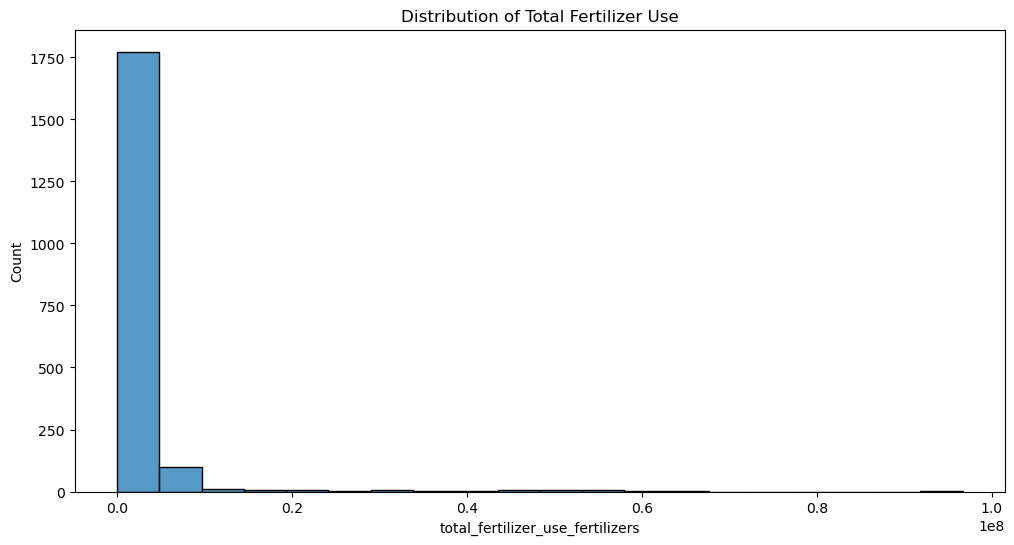

In [190]:
# plot the distribution of total_fertilizers
plt.figure(figsize=(12, 6))
sns.histplot(fertilizers_final_df['total_fertilizer_use_fertilizers'], bins=20)
plt.title('Distribution of Total Fertilizer Use')
plt.show()

In [191]:
# summarize the data
fertilizers_final_df.describe()

Item,Year,total_fertilizer_use_fertilizers
count,1933.000000,1.933000e+03
mean,2010.070874,1.957127e+06
std,5.299190,7.041180e+06
min,2002.000000,0.000000e+00
25%,2006.000000,2.417800e+04
50%,2009.000000,1.772930e+05
75%,2014.000000,8.939769e+05
max,2021.000000,9.665856e+07


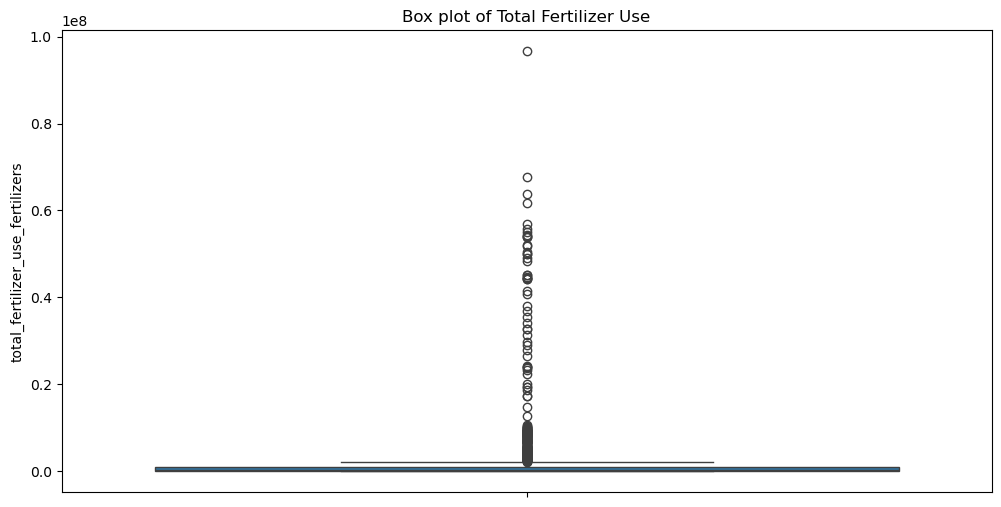

In [192]:
# box plot 
plt.figure(figsize=(12, 6))
sns.boxplot(y='total_fertilizer_use_fertilizers', data=fertilizers_final_df)
plt.title('Box plot of Total Fertilizer Use')
plt.show()

In [193]:
# save to a csv
fertilizers_final_df.to_csv('fertilizers_final_df.csv', index=False)

### Food Balance Indicators Data Set

In [194]:
food_bal_df.shape

(148041, 14)

In [195]:
food_bal_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (FBS),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2010,2010,1000 t,2000.0,E,Estimated value
1,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2011,2011,1000 t,2448.0,E,Estimated value
2,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2012,2012,1000 t,2001.0,E,Estimated value
3,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2013,2013,1000 t,2155.0,E,Estimated value
4,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2014,2014,1000 t,1840.0,E,Estimated value


In [196]:
food_bal_df.describe()

,Area Code (M49),Element Code,Year Code,Year,Value
count,148041.000000,148041.000000,148041.000000,148041.000000,148041.000000
mean,425.675185,5429.812417,2015.549274,2015.549274,957.153400
std,251.359288,324.840991,3.452477,3.452477,9591.749593
min,4.000000,5123.000000,2010.000000,2010.000000,-62.000000
25%,204.000000,5142.000000,2013.000000,2013.000000,1.000000
50%,417.000000,5154.000000,2016.000000,2016.000000,25.000000
75%,642.000000,5611.000000,2019.000000,2019.000000,218.190000
max,894.000000,5911.000000,2021.000000,2021.000000,573218.000000


In [197]:
food_bal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148041 entries, 0 to 148040
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Domain Code       148041 non-null  object 
 1   Domain            148041 non-null  object 
 2   Area Code (M49)   148041 non-null  int64  
 3   Area              148041 non-null  object 
 4   Element Code      148041 non-null  int64  
 5   Element           148041 non-null  object 
 6   Item Code (FBS)   148041 non-null  object 
 7   Item              148041 non-null  object 
 8   Year Code         148041 non-null  int64  
 9   Year              148041 non-null  int64  
 10  Unit              148041 non-null  object 
 11  Value             148041 non-null  float64
 12  Flag              148041 non-null  object 
 13  Flag Description  148041 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 15.8+ MB


In [198]:
food_bal_df.isnull().sum()

Domain Code         0
Domain              0
Area Code (M49)     0
Area                0
Element Code        0
Element             0
Item Code (FBS)     0
Item                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64

In [199]:
food_bal_df.eq(0).sum()

Domain Code             0
Domain                  0
Area Code (M49)         0
Area                    0
Element Code            0
Element                 0
Item Code (FBS)         0
Item                    0
Year Code               0
Year                    0
Unit                    0
Value               27287
Flag                    0
Flag Description        0
dtype: int64

In [200]:
# Pivot the data to create separate columns for each element
food_bal_pivot_df = food_bal_df.pivot_table(index=["Area", "Year", "Item"], columns="Element", values="Value", aggfunc='first')

# Reset the index to flatten the dataframe
food_bal_pivot_df.reset_index(inplace=True)

# Display the first few rows of the transformed dataframe
food_bal_pivot_df.head()

Element,Area,Year,Item,Export Quantity,Food,Import Quantity,Losses,Other uses (non-food)
0,Afghanistan,2010,Alcoholic Beverages,NaN,3.00,3.00,NaN,NaN
1,Afghanistan,2010,Cereals - Excluding Beer,0.0,5715.00,2000.00,837.0,NaN
2,Afghanistan,2010,Eggs,NaN,25.00,13.00,1.0,NaN
3,Afghanistan,2010,"Fish, Seafood",0.0,3.26,0.01,NaN,0.0
4,Afghanistan,2010,Fruits - Excluding Wine,158.0,744.00,176.00,58.0,NaN


In [201]:
food_bal_pivot_df.shape

(36841, 8)

In [202]:
food_bal_pivot_df.isnull().sum()

Element
Area                         0
Year                         0
Item                         0
Export Quantity           3165
Food                      1045
Import Quantity            660
Losses                   12120
Other uses (non-food)    19174
dtype: int64

In [203]:
food_bal_pivot_df.eq(0).sum()

Element
Area                        0
Year                        0
Item                        0
Export Quantity          9111
Food                     1900
Import Quantity          3933
Losses                   5399
Other uses (non-food)    6944
dtype: int64

In [297]:
# Pivot the data again to combine 'Item' and 'Element' in column labels
food_bal_pivot2_df = food_bal_df.pivot_table(index=["Area", "Year"], columns=["Item", "Element"], values="Value", aggfunc='first')

# Flatten the multi-level column headers into a single level with combined names
food_bal_pivot2_df.columns = [' '.join(col).strip() for col in food_bal_pivot2_df.columns.values]
food_bal_pivot2_df.reset_index(inplace=True)

# Display the first few rows of the expanded dataframe
food_bal_pivot2_df.head()

,Area,Year,Alcoholic Beverages Export Quantity,Alcoholic Beverages Food,Alcoholic Beverages Import Quantity,Alcoholic Beverages Losses,Alcoholic Beverages Other uses (non-food),Cereals - Excluding Beer Export Quantity,Cereals - Excluding Beer Food,Cereals - Excluding Beer Import Quantity,...,Vegetable Oils Export Quantity,Vegetable Oils Food,Vegetable Oils Import Quantity,Vegetable Oils Losses,Vegetable Oils Other uses (non-food),Vegetables Export Quantity,Vegetables Food,Vegetables Import Quantity,Vegetables Losses,Vegetables Other uses (non-food)
0,Afghanistan,2010,NaN,3.0,3.0,NaN,NaN,0.0,5715.0,2000.0,...,NaN,149.0,357.0,NaN,215.0,149.0,1283.0,23.0,167.0,NaN
1,Afghanistan,2011,NaN,3.0,3.0,NaN,NaN,0.0,5771.0,2448.0,...,NaN,137.0,382.0,NaN,257.0,73.0,1148.0,130.0,129.0,NaN
2,Afghanistan,2012,NaN,3.0,3.0,NaN,NaN,0.0,5798.0,2001.0,...,NaN,164.0,588.0,NaN,442.0,28.0,1177.0,99.0,127.0,NaN
3,Afghanistan,2013,NaN,2.0,3.0,NaN,NaN,0.0,6090.0,2155.0,...,NaN,180.0,588.0,NaN,428.0,37.0,1120.0,124.0,117.0,NaN
4,Afghanistan,2014,0.0,1.0,1.0,NaN,NaN,2.0,6219.0,1840.0,...,1.0,203.0,214.0,NaN,20.0,69.0,1711.0,409.0,167.0,NaN


In [299]:
food_bal_pivot2_df.shape

(2177, 86)

In [298]:
# show the full columns with their Nan values
pd.set_option('display.max_rows', None)
food_bal_pivot2_df.isnull().sum()

Area                                                 0
Year                                                 0
Alcoholic Beverages Export Quantity                 95
Alcoholic Beverages Food                            17
Alcoholic Beverages Import Quantity                  1
Alcoholic Beverages Losses                        1925
Alcoholic Beverages Other uses (non-food)          195
Cereals - Excluding Beer Export Quantity            47
Cereals - Excluding Beer Food                        1
Cereals - Excluding Beer Import Quantity             1
Cereals - Excluding Beer Losses                     51
Cereals - Excluding Beer Other uses (non-food)     209
Eggs Export Quantity                               632
Eggs Food                                            1
Eggs Import Quantity                                23
Eggs Losses                                         49
Eggs Other uses (non-food)                        1322
Fish, Seafood Export Quantity                        0
Fish, Seaf

In [300]:
pd.set_option('display.max_rows', None)
food_bal_pivot2_df.eq(0).sum()

Area                                                 0
Year                                                 0
Alcoholic Beverages Export Quantity                488
Alcoholic Beverages Food                            69
Alcoholic Beverages Import Quantity                 69
Alcoholic Beverages Losses                          19
Alcoholic Beverages Other uses (non-food)          518
Cereals - Excluding Beer Export Quantity           317
Cereals - Excluding Beer Food                        6
Cereals - Excluding Beer Import Quantity             7
Cereals - Excluding Beer Losses                    172
Cereals - Excluding Beer Other uses (non-food)     444
Eggs Export Quantity                               683
Eggs Food                                           72
Eggs Import Quantity                               684
Eggs Losses                                        553
Eggs Other uses (non-food)                         725
Fish, Seafood Export Quantity                      140
Fish, Seaf

### Food Security Indicators Data Set

In [306]:
food_sec_df.shape

(36512, 15)

In [307]:
food_sec_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20002002,2000-2002,%,88.0,E,Estimated value,NaN
1,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20012003,2001-2003,%,89.0,E,Estimated value,NaN
2,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20022004,2002-2004,%,92.0,E,Estimated value,NaN
3,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20032005,2003-2005,%,93.0,E,Estimated value,NaN
4,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20042006,2004-2006,%,94.0,E,Estimated value,NaN


In [308]:
food_sec_df.describe()

,Area Code (M49),Element Code,Item Code,Year Code,Value
count,36512.000000,36512.000000,36512.000000,3.651200e+04,36512.000000
mean,424.835342,6122.999233,21030.970777,9.691701e+06,37.620671
std,252.424973,2.662834,11.014761,1.004127e+07,67.159815
min,4.000000,6121.000000,21010.000000,2.000000e+03,-654.900000
25%,204.000000,6121.000000,21030.000000,2.010000e+03,5.000000
50%,417.000000,6121.000000,21032.000000,2.020000e+03,18.700000
75%,642.000000,6125.000000,21035.000000,2.009201e+07,58.700000
max,894.000000,6128.000000,21049.000000,2.020202e+07,5735.000000


In [309]:
food_sec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36512 entries, 0 to 36511
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       36512 non-null  object 
 1   Domain            36512 non-null  object 
 2   Area Code (M49)   36512 non-null  int64  
 3   Area              36512 non-null  object 
 4   Element Code      36512 non-null  int64  
 5   Element           36512 non-null  object 
 6   Item Code         36512 non-null  int64  
 7   Item              36512 non-null  object 
 8   Year Code         36512 non-null  int64  
 9   Year              36512 non-null  object 
 10  Unit              36512 non-null  object 
 11  Value             36512 non-null  float64
 12  Flag              36512 non-null  object 
 13  Flag Description  36512 non-null  object 
 14  Note              1 non-null      object 
dtypes: float64(1), int64(4), object(10)
memory usage: 4.2+ MB


In [310]:
food_sec_df.isnull().sum()

Domain Code             0
Domain                  0
Area Code (M49)         0
Area                    0
Element Code            0
Element                 0
Item Code               0
Item                    0
Year Code               0
Year                    0
Unit                    0
Value                   0
Flag                    0
Flag Description        0
Note                36511
dtype: int64

In [311]:
food_sec_df.eq(0).sum()

Domain Code           0
Domain                0
Area Code (M49)       0
Area                  0
Element Code          0
Element               0
Item Code             0
Item                  0
Year Code             0
Year                  0
Unit                  0
Value               269
Flag                  0
Flag Description      0
Note                  0
dtype: int64

In [312]:
# Define the specific items known to be given in 3-year averages
three_year_average_items = [
    'Average dietary energy supply adequacy (percent) (3-year average)',
    'Average protein supply (g/cap/day) (3-year average)',
    'Cereal import dependency ratio (percent) (3-year average)',
    'Percent of arable land equipped for irrigation (percent) (3-year average)',
    'Value of food imports in total merchandise exports (percent) (3-year average)'
]

# Filter the dataset to exclude these specific 3-year average items
yearly_specific_data = food_sec_df[~food_sec_df['Item'].isin(three_year_average_items)]

# Pivot the table to create separate columns for each 'Item'
yearly_pivot_data = yearly_specific_data.pivot_table(index=['Area', 'Year'], columns='Item', values='Value', aggfunc='first')

In [313]:
yearly_pivot_data.reset_index(inplace=True)

In [314]:
yearly_pivot_data.shape

(4470, 7)

In [315]:
yearly_pivot_data.head()

Item,Area,Year,Per capita food production variability (constant 2014-2016 thousand int$ per capita),Per capita food supply variability (kcal/cap/day),Political stability and absence of violence/terrorism (index),Prevalence of anemia among women of reproductive age (15-49 years),Prevalence of low birthweight (percent)
0,Afghanistan,2000,NaN,58.0,-2.44,35.7,NaN
1,Afghanistan,2001,16.3,47.0,NaN,35.6,NaN
2,Afghanistan,2002,21.0,71.0,-2.04,35.4,NaN
3,Afghanistan,2003,20.8,72.0,-2.20,35.4,NaN
4,Afghanistan,2004,17.3,50.0,-2.30,35.5,NaN


In [316]:
yearly_pivot_data.columns

Index(['Area', 'Year',
       'Per capita food production variability (constant 2014-2016 thousand int$ per capita)',
       'Per capita food supply variability (kcal/cap/day)',
       'Political stability and absence of violence/terrorism (index)',
       'Prevalence of anemia among women of reproductive age (15-49 years)',
       'Prevalence of low birthweight (percent)'],
      dtype='object', name='Item')

In [317]:
yearly_pivot_data.isnull().sum()

Item
Area                                                                                       0
Year                                                                                       0
Per capita food production variability (constant 2014-2016 thousand int$ per capita)     550
Per capita food supply variability (kcal/cap/day)                                        694
Political stability and absence of violence/terrorism (index)                            396
Prevalence of anemia among women of reproductive age (15-49 years)                       610
Prevalence of low birthweight (percent)                                                 1194
dtype: int64

In [318]:
yearly_pivot_data.isnull().mean() * 100

Item
Area                                                                                     0.000000
Year                                                                                     0.000000
Per capita food production variability (constant 2014-2016 thousand int$ per capita)    12.304251
Per capita food supply variability (kcal/cap/day)                                       15.525727
Political stability and absence of violence/terrorism (index)                            8.859060
Prevalence of anemia among women of reproductive age (15-49 years)                      13.646532
Prevalence of low birthweight (percent)                                                 26.711409
dtype: float64

In [319]:
yearly_pivot_data.eq(0).sum()

Item
Area                                                                                     0
Year                                                                                     0
Per capita food production variability (constant 2014-2016 thousand int$ per capita)     0
Per capita food supply variability (kcal/cap/day)                                        0
Political stability and absence of violence/terrorism (index)                           21
Prevalence of anemia among women of reproductive age (15-49 years)                       0
Prevalence of low birthweight (percent)                                                  0
dtype: int64

In [320]:
# save to a csv
yearly_pivot_data.to_csv('yearly_pivot_data.csv', index=False)

In [321]:
food_sec_final_year_df = yearly_pivot_data[['Area', 'Year', 'Per capita food production variability (constant 2014-2016 thousand int$ per capita)', 'Per capita food supply variability (kcal/cap/day)', 'Political stability and absence of violence/terrorism (index)']]

In [322]:
food_sec_final_year_df.head()

Item,Area,Year,Per capita food production variability (constant 2014-2016 thousand int$ per capita),Per capita food supply variability (kcal/cap/day),Political stability and absence of violence/terrorism (index)
0,Afghanistan,2000,NaN,58.0,-2.44
1,Afghanistan,2001,16.3,47.0,NaN
2,Afghanistan,2002,21.0,71.0,-2.04
3,Afghanistan,2003,20.8,72.0,-2.20
4,Afghanistan,2004,17.3,50.0,-2.30


In [323]:
food_sec_final_year_df.shape

(4470, 5)

In [324]:
food_sec_final_year_df.describe()

Item,Per capita food production variability (constant 2014-2016 thousand int$ per capita),Per capita food supply variability (kcal/cap/day),Political stability and absence of violence/terrorism (index)
count,3920.000000,3776.000000,4074.000000
mean,18.491709,41.751324,-0.058142
std,20.144520,29.695958,0.997195
min,0.100000,2.000000,-3.310000
25%,6.200000,23.000000,-0.710000
50%,12.100000,34.000000,0.050000
75%,22.700000,53.000000,0.790000
max,190.900000,278.000000,1.970000


In [325]:
# save to a csv
food_sec_final_year_df.to_csv('food_sec_final_year_df.csv', index=False)

In [326]:
# Step 3: Filter data for only 3-year average items
data_filtered = food_sec_df[food_sec_df['Item'].isin(three_year_average_items)]

# Step 4: Extract the starting and ending years from the 'Year' column
data_filtered['Start_Year'] = data_filtered['Year'].str.split('-').str[0].astype(int)
data_filtered['End_Year'] = data_filtered['Year'].str.split('-').str[1].astype(int)

# Expand data to include each year within the range
expanded_data = pd.DataFrame([
    {'Area': row['Area'], 'Item': row['Item'], 'Year': year}
    for _, row in data_filtered.iterrows()
    for year in range(row['Start_Year'], row['End_Year'] + 1)
])

# Add the 'Value' column to expanded_data
expanded_data = expanded_data.merge(
    data_filtered[['Area', 'Item', 'Start_Year', 'Value']],
    how='left',
    left_on=['Area', 'Item', 'Year'],
    right_on=['Area', 'Item', 'Start_Year']
)

# Drop unnecessary 'Start_Year' column
expanded_data.drop('Start_Year', axis=1, inplace=True)

# Interpolate missing values
expanded_data['Value'] = expanded_data.groupby(['Area', 'Item'])['Value'].transform(lambda x: x.interpolate(method='linear'))

# Check results
print(expanded_data.head())

C:\Users\saqib\AppData\Local\Temp\ipykernel_332252\1833427299.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Start_Year'] = data_filtered['Year'].str.split('-').str[0].astype(int)
C:\Users\saqib\AppData\Local\Temp\ipykernel_332252\1833427299.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['End_Year'] = data_filtered['Year'].str.split('-').str[1].astype(int)


          Area                                               Item  Year  Value
0  Afghanistan  Average dietary energy supply adequacy (percen...  2000   88.0
1  Afghanistan  Average dietary energy supply adequacy (percen...  2001   89.0
2  Afghanistan  Average dietary energy supply adequacy (percen...  2002   92.0
3  Afghanistan  Average dietary energy supply adequacy (percen...  2001   89.0
4  Afghanistan  Average dietary energy supply adequacy (percen...  2002   92.0


In [327]:
expanded_data.shape

(52818, 4)

In [328]:
food_sec_df.shape

(36512, 15)

In [329]:
yearly_pivot_data.shape

(4470, 7)

In [330]:
expanded_data.head()

,Area,Item,Year,Value
0,Afghanistan,Average dietary energy supply adequacy (percen...,2000,88.0
1,Afghanistan,Average dietary energy supply adequacy (percen...,2001,89.0
2,Afghanistan,Average dietary energy supply adequacy (percen...,2002,92.0
3,Afghanistan,Average dietary energy supply adequacy (percen...,2001,89.0
4,Afghanistan,Average dietary energy supply adequacy (percen...,2002,92.0


In [331]:
# Pivot the DataFrame so each item becomes a column
avg_pivot_data = expanded_data.pivot_table(
    index=['Area', 'Year'],  # Rows (index) will be unique combinations of 'Area' and 'Year'
    columns='Item',          # Columns to pivot into header, creating a column for each unique 'Item'
    values='Value',          # The values to use to fill the table
    aggfunc='first'          # Function to aggregate values, 'first' takes the first non-NA value encountered
)

# Reset the index if you want 'Area' and 'Year' back as regular columns
avg_pivot_data.reset_index(inplace=True)

In [332]:
avg_pivot_data.head()

Item,Area,Year,Average dietary energy supply adequacy (percent) (3-year average),Average protein supply (g/cap/day) (3-year average),Cereal import dependency ratio (percent) (3-year average),Percent of arable land equipped for irrigation (percent) (3-year average),Value of food imports in total merchandise exports (percent) (3-year average)
0,Afghanistan,2000,88.0,51.4,34.1,4.9,240.0
1,Afghanistan,2001,89.0,52.1,29.3,4.9,281.0
2,Afghanistan,2002,92.0,54.0,21.1,4.9,199.0
3,Afghanistan,2003,93.0,54.0,18.5,4.9,187.0
4,Afghanistan,2004,94.0,53.6,19.2,4.9,175.0


In [333]:
avg_pivot_data.shape

(4510, 7)

In [334]:
avg_pivot_data.isnull().sum()

Item
Area                                                                               0
Year                                                                               0
Average dietary energy supply adequacy (percent) (3-year average)                502
Average protein supply (g/cap/day) (3-year average)                              760
Cereal import dependency ratio (percent) (3-year average)                        953
Percent of arable land equipped for irrigation (percent) (3-year average)        609
Value of food imports in total merchandise exports (percent) (3-year average)    258
dtype: int64

In [335]:
avg_pivot_data.isnull().mean() * 100

Item
Area                                                                              0.000000
Year                                                                              0.000000
Average dietary energy supply adequacy (percent) (3-year average)                11.130820
Average protein supply (g/cap/day) (3-year average)                              16.851441
Cereal import dependency ratio (percent) (3-year average)                        21.130820
Percent of arable land equipped for irrigation (percent) (3-year average)        13.503326
Value of food imports in total merchandise exports (percent) (3-year average)     5.720621
dtype: float64

In [336]:
avg_pivot_data.eq(0).sum()

Item
Area                                                                               0
Year                                                                               0
Average dietary energy supply adequacy (percent) (3-year average)                  0
Average protein supply (g/cap/day) (3-year average)                                0
Cereal import dependency ratio (percent) (3-year average)                          1
Percent of arable land equipped for irrigation (percent) (3-year average)        273
Value of food imports in total merchandise exports (percent) (3-year average)      0
dtype: int64

In [337]:
# save to a csv
avg_pivot_data.to_csv('avg_pivot_data.csv', index=False)

In [338]:
food_sec_avg_final_df = avg_pivot_data[['Area', 'Year', 'Average dietary energy supply adequacy (percent) (3-year average)', 'Percent of arable land equipped for irrigation (percent) (3-year average)']]

In [339]:
food_sec_avg_final_df.shape

(4510, 4)

In [340]:
food_sec_avg_final_df.head()

Item,Area,Year,Average dietary energy supply adequacy (percent) (3-year average),Percent of arable land equipped for irrigation (percent) (3-year average)
0,Afghanistan,2000,88.0,4.9
1,Afghanistan,2001,89.0,4.9
2,Afghanistan,2002,92.0,4.9
3,Afghanistan,2003,93.0,4.9
4,Afghanistan,2004,94.0,4.9


In [341]:
food_sec_avg_final_df.describe()

Item,Year,Average dietary energy supply adequacy (percent) (3-year average),Percent of arable land equipped for irrigation (percent) (3-year average)
count,4510.000000,4008.000000,3901.00000
mean,2010.956098,119.567365,3.47434
std,6.604455,15.480538,5.48354
min,2000.000000,35.000000,0.00000
25%,2005.000000,109.000000,0.30000
50%,2011.000000,120.000000,1.10000
75%,2017.000000,131.000000,4.90000
max,2022.000000,160.000000,60.40000


In [342]:
# save to a csv
food_sec_avg_final_df.to_csv('food_sec_avg_final_df.csv', index=False)

### Foreign Direct Investment Data Set

In [210]:
fdi_df.shape

(12276, 15)

In [211]:
fdi_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2000,2000,million USD,0.17,X,Figure from international organizations,UNCTAD
1,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2001,2001,million USD,0.68,X,Figure from international organizations,UNCTAD
2,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2002,2002,million USD,50.00,X,Figure from international organizations,UNCTAD
3,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2003,2003,million USD,57.80,X,Figure from international organizations,UNCTAD
4,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2004,2004,million USD,186.90,X,Figure from international organizations,UNCTAD


In [212]:
fdi_df.describe()

,Area Code (M49),Element Code,Item Code,Year Code,Year,Value
count,12276.000000,12276.0,12276.000000,12276.000000,12276.000000,12276.000000
mean,420.778674,6110.0,23082.692978,2011.305148,2011.305148,5230.433618
std,248.237052,0.0,1.745190,6.470153,6.470153,23875.653754
min,4.000000,6110.0,23080.000000,2000.000000,2000.000000,-322053.781300
25%,204.000000,6110.0,23082.000000,2006.000000,2006.000000,4.914940
50%,410.000000,6110.0,23082.000000,2012.000000,2012.000000,93.866445
75%,626.000000,6110.0,23085.000000,2017.000000,2017.000000,1116.813653
max,894.000000,6110.0,23085.000000,2022.000000,2022.000000,467625.000000


In [213]:
fdi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12276 entries, 0 to 12275
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       12276 non-null  object 
 1   Domain            12276 non-null  object 
 2   Area Code (M49)   12276 non-null  int64  
 3   Area              12276 non-null  object 
 4   Element Code      12276 non-null  int64  
 5   Element           12276 non-null  object 
 6   Item Code         12276 non-null  int64  
 7   Item              12276 non-null  object 
 8   Year Code         12276 non-null  int64  
 9   Year              12276 non-null  int64  
 10  Unit              12276 non-null  object 
 11  Value             12276 non-null  float64
 12  Flag              12276 non-null  object 
 13  Flag Description  12276 non-null  object 
 14  Note              12276 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 1.4+ MB


In [214]:
# Check the number of unique years available for each area
years_per_area = fdi_df.groupby('Area')['Year'].nunique()
years_per_area

Area
Afghanistan                           22
Albania                               23
Algeria                               23
Angola                                23
Anguilla                              23
                                      ..
Venezuela (Bolivarian Republic of)    23
Viet Nam                              23
Yemen                                 20
Zambia                                23
Zimbabwe                              23
Name: Year, Length: 210, dtype: int64

In [215]:
# Check for the number of non-null values in each item category by year across all areas
item_coverage_by_year = fdi_df.groupby(['Year', 'Item']).apply(lambda x: x['Value'].notnull().sum()).unstack()
item_coverage_by_year

C:\Users\saqib\AppData\Local\Temp\ipykernel_332252\1260841880.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  item_coverage_by_year = fdi_df.groupby(['Year', 'Item']).apply(lambda x: x['Value'].notnull().sum()).unstack()


Item,"FDI inflows to Agriculture, Forestry and Fishing","FDI inflows to Food, Beverages and Tobacco","FDI outflows to Agriculture, Forestry and Fishing","FDI outflows to Food, Beverages and Tobacco",Total FDI inflows,Total FDI outflows
Year,,,,,,
2000,47,42,20,23,195,126
2001,57,42,22,22,196,132
2002,56,44,20,24,198,139
2003,59,47,24,24,196,139
2004,63,49,27,25,198,143
2005,72,47,28,26,200,144
2006,71,48,27,27,200,143
2007,75,47,24,27,200,149
2008,79,46,27,29,199,151


In [216]:
fdi_df.isnull().sum()

Domain Code         0
Domain              0
Area Code (M49)     0
Area                0
Element Code        0
Element             0
Item Code           0
Item                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
Note                0
dtype: int64

In [217]:
fdi_df.eq(0).sum()

Domain Code         0
Domain              0
Area Code (M49)     0
Area                0
Element Code        0
Element             0
Item Code           0
Item                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
Note                0
dtype: int64

In [218]:
# Pivot the table to get separate columns for each item
fdi_pivot_df = fdi_df.pivot_table(values='Value', index=['Area', 'Year'], columns='Item', aggfunc='first')

# Reset the index to get 'Area' and 'Year' back as columns
fdi_pivot_df.reset_index(inplace=True)

In [219]:
fdi_pivot_df.shape

(4580, 8)

In [220]:
fdi_pivot_df.isnull().sum()

Item
Area                                                    0
Year                                                    0
FDI inflows to Agriculture, Forestry and Fishing     2964
FDI inflows to Food, Beverages and Tobacco           3475
FDI outflows to Agriculture, Forestry and Fishing    3867
FDI outflows to Food, Beverages and Tobacco          3883
Total FDI inflows                                      14
Total FDI outflows                                   1001
dtype: int64

In [221]:
fdi_pivot_df.isnull().mean() * 100

Item
Area                                                  0.000000
Year                                                  0.000000
FDI inflows to Agriculture, Forestry and Fishing     64.716157
FDI inflows to Food, Beverages and Tobacco           75.873362
FDI outflows to Agriculture, Forestry and Fishing    84.432314
FDI outflows to Food, Beverages and Tobacco          84.781659
Total FDI inflows                                     0.305677
Total FDI outflows                                   21.855895
dtype: float64

In [222]:
fdi_pivot_df.eq(0).sum()

Item
Area                                                 0
Year                                                 0
FDI inflows to Agriculture, Forestry and Fishing     0
FDI inflows to Food, Beverages and Tobacco           0
FDI outflows to Agriculture, Forestry and Fishing    0
FDI outflows to Food, Beverages and Tobacco          0
Total FDI inflows                                    0
Total FDI outflows                                   0
dtype: int64

In [223]:
fdi_pivot_df.describe()

Item,Year,"FDI inflows to Agriculture, Forestry and Fishing","FDI inflows to Food, Beverages and Tobacco","FDI outflows to Agriculture, Forestry and Fishing","FDI outflows to Food, Beverages and Tobacco",Total FDI inflows,Total FDI outflows
count,4580.000000,1616.000000,1105.000000,713.000000,697.000000,4566.000000,3579.000000
mean,2011.036026,85.775233,558.285727,39.220571,422.482884,6908.004311,8826.181075
std,6.621206,478.023670,2868.021427,731.797741,4477.245714,24794.740764,33459.601257
min,2000.000000,-1209.389531,-6276.895383,-17513.947170,-90599.551520,-322053.781300,-264952.233700
25%,2005.000000,0.933000,1.578000,-0.065233,0.000001,83.990045,3.219718
50%,2011.000000,10.628991,46.255014,1.494560,19.198008,581.949849,77.122151
75%,2017.000000,43.441655,256.654689,22.375000,265.240000,3235.805440,2361.320570
max,2022.000000,15126.674500,42658.000000,3287.150000,25515.730790,467625.000000,396569.000000


In [224]:
fdi_final_df = fdi_pivot_df[['Area', 'Year', 'Total FDI inflows']]

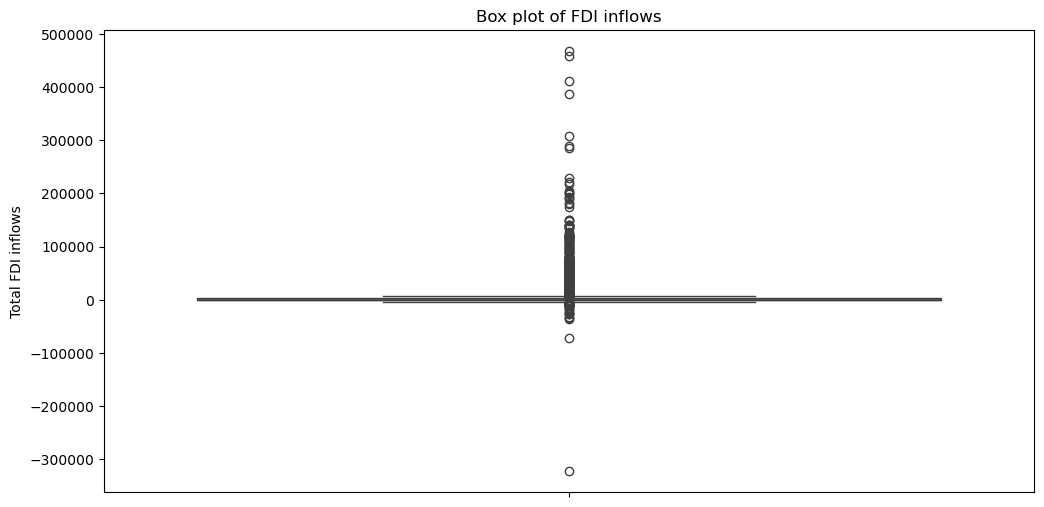

In [225]:
# box plot for the temp_final_df
plt.figure(figsize=(12, 6))
sns.boxplot(y='Total FDI inflows', data=fdi_final_df)
plt.title('Box plot of FDI inflows')
plt.show()

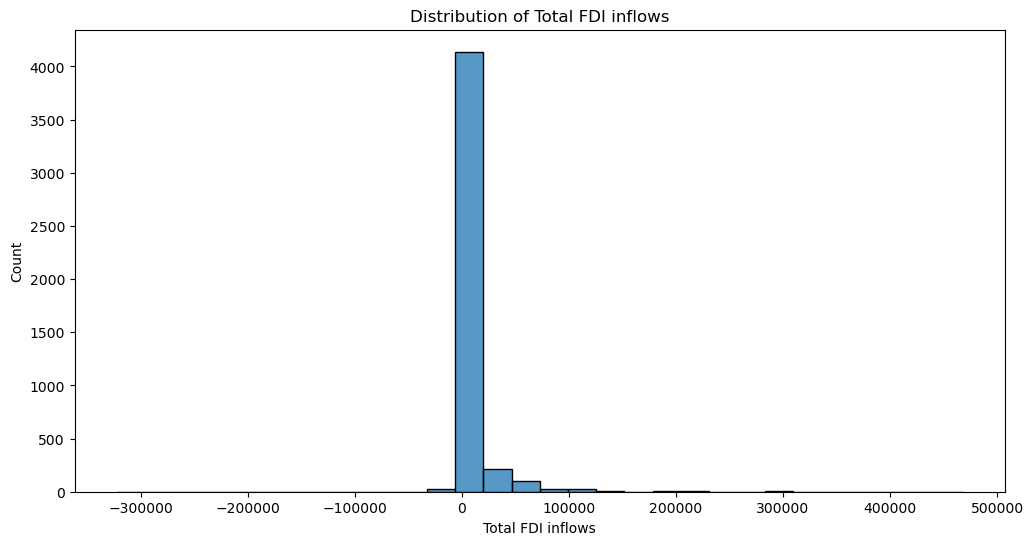

In [226]:
# distribution for the temp_final_df
plt.figure(figsize=(12, 6))
sns.histplot(fdi_final_df['Total FDI inflows'], bins=30)
plt.title('Distribution of Total FDI inflows')
plt.show()

In [227]:
# save to a csv
fdi_final_df.to_csv('fdi_final_df.csv', index=False)

### Land Temperature Change Data Set

In [228]:
temp_df.shape

(54810, 14)

In [229]:
temp_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2000,2000,°c,0.618,E,Estimated value
1,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2001,2001,°c,0.365,E,Estimated value
2,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2002,2002,°c,1.655,E,Estimated value
3,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2003,2003,°c,0.997,E,Estimated value
4,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2004,2004,°c,1.883,E,Estimated value


In [230]:
temp_df.describe()

,Area Code (M49),Element Code,Months Code,Year Code,Year,Value
count,54810.000000,54810.000000,54810.000000,54810.000000,54810.000000,48255.000000
mean,434.977194,6674.500000,7018.000000,2011.021346,2011.021346,0.802197
std,253.978304,596.505442,1.414226,6.629795,6.629795,0.669648
min,4.000000,6078.000000,7016.000000,2000.000000,2000.000000,-4.176000
25%,214.000000,6078.000000,7017.000000,2005.000000,2005.000000,0.364000
50%,434.000000,6674.500000,7018.000000,2011.000000,2011.000000,0.643000
75%,654.000000,7271.000000,7019.000000,2017.000000,2017.000000,1.084000
max,894.000000,7271.000000,7020.000000,2022.000000,2022.000000,8.200000


In [231]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54810 entries, 0 to 54809
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       54810 non-null  object 
 1   Domain            54810 non-null  object 
 2   Area Code (M49)   54810 non-null  int64  
 3   Area              54810 non-null  object 
 4   Element Code      54810 non-null  int64  
 5   Element           54810 non-null  object 
 6   Months Code       54810 non-null  int64  
 7   Months            54810 non-null  object 
 8   Year Code         54810 non-null  int64  
 9   Year              54810 non-null  int64  
 10  Unit              54810 non-null  object 
 11  Value             48255 non-null  float64
 12  Flag              54810 non-null  object 
 13  Flag Description  54810 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 5.9+ MB


In [232]:
# checking NaN Values
temp_df.isnull().sum()

Domain Code            0
Domain                 0
Area Code (M49)        0
Area                   0
Element Code           0
Element                0
Months Code            0
Months                 0
Year Code              0
Year                   0
Unit                   0
Value               6555
Flag                   0
Flag Description       0
dtype: int64

In [233]:
# check 0 values in the dataframe
temp_df.eq(0).sum()

Domain Code         0
Domain              0
Area Code (M49)     0
Area                0
Element Code        0
Element             0
Months Code         0
Months              0
Year Code           0
Year                0
Unit                0
Value               1
Flag                0
Flag Description    0
dtype: int64

In [234]:
temp_df.describe()

,Area Code (M49),Element Code,Months Code,Year Code,Year,Value
count,54810.000000,54810.000000,54810.000000,54810.000000,54810.000000,48255.000000
mean,434.977194,6674.500000,7018.000000,2011.021346,2011.021346,0.802197
std,253.978304,596.505442,1.414226,6.629795,6.629795,0.669648
min,4.000000,6078.000000,7016.000000,2000.000000,2000.000000,-4.176000
25%,214.000000,6078.000000,7017.000000,2005.000000,2005.000000,0.364000
50%,434.000000,6674.500000,7018.000000,2011.000000,2011.000000,0.643000
75%,654.000000,7271.000000,7019.000000,2017.000000,2017.000000,1.084000
max,894.000000,7271.000000,7020.000000,2022.000000,2022.000000,8.200000


In [235]:
# Filter the data to include only rows where 'Element' is 'Temperature change'
temp_df_temp_only = temp_df[temp_df['Element'] == 'Temperature change']

In [236]:
# checking NaN Values
temp_df_temp_only.isnull().sum()

Domain Code            0
Domain                 0
Area Code (M49)        0
Area                   0
Element Code           0
Element                0
Months Code            0
Months                 0
Year Code              0
Year                   0
Unit                   0
Value               1285
Flag                   0
Flag Description       0
dtype: int64

In [237]:
# check 0 values in the dataframe
temp_df_temp_only.eq(0).sum()

Domain Code         0
Domain              0
Area Code (M49)     0
Area                0
Element Code        0
Element             0
Months Code         0
Months              0
Year Code           0
Year                0
Unit                0
Value               1
Flag                0
Flag Description    0
dtype: int64

In [238]:
temp_df_temp_only.shape

(27405, 14)

In [239]:
temp_df_temp_only.describe()

,Area Code (M49),Element Code,Months Code,Year Code,Year,Value
count,27405.000000,27405.0,27405.000000,27405.000000,27405.000000,26120.000000
mean,434.977194,7271.0,7018.000000,2011.021346,2011.021346,1.052784
std,253.980621,0.0,1.414239,6.629856,6.629856,0.780980
min,4.000000,7271.0,7016.000000,2000.000000,2000.000000,-4.176000
25%,214.000000,7271.0,7017.000000,2005.000000,2005.000000,0.595000
50%,434.000000,7271.0,7018.000000,2011.000000,2011.000000,0.969000
75%,654.000000,7271.0,7019.000000,2017.000000,2017.000000,1.435000
max,894.000000,7271.0,7020.000000,2022.000000,2022.000000,8.200000


In [240]:
temp_pivot_df = temp_df.pivot_table(index=['Area', 'Year'], columns='Months', values='Value', aggfunc='first').reset_index()
temp_pivot_df.columns = [f'{col[1]}' if col[1] else f'{col[0]}' for col in temp_pivot_df.columns]

In [241]:
temp_pivot_df.columns = ['Area', 'Year', 'Dec–Jan–Feb', 'Jun–Jul–Aug', 'Mar–Apr–May', 'Meteorological year', 'Sep–Oct–Nov']

In [242]:
temp_pivot_df.head()

,Area,Year,Dec–Jan–Feb,Jun–Jul–Aug,Mar–Apr–May,Meteorological year,Sep–Oct–Nov
0,Afghanistan,2000,0.618,0.330,2.407,0.993,0.617
1,Afghanistan,2001,0.365,1.065,2.692,1.311,1.122
2,Afghanistan,2002,1.655,0.881,1.425,1.365,1.499
3,Afghanistan,2003,0.997,0.821,-0.159,0.587,0.689
4,Afghanistan,2004,1.883,0.650,1.901,1.373,1.059


In [243]:
temp_pivot_df.shape

(5268, 7)

In [244]:
# checking NaN Values
temp_pivot_df.isnull().sum()

Area                    0
Year                    0
Dec–Jan–Feb            44
Jun–Jul–Aug            40
Mar–Apr–May            45
Meteorological year    49
Sep–Oct–Nov            42
dtype: int64

In [245]:
# check 0 values in the dataframe
temp_pivot_df.eq(0).sum()

Area                   0
Year                   0
Dec–Jan–Feb            1
Jun–Jul–Aug            0
Mar–Apr–May            0
Meteorological year    0
Sep–Oct–Nov            0
dtype: int64

In [246]:
# create a new data with only the columns 'Area', 'Year', 'Meteorological year'
temp_final_df = temp_pivot_df[['Area', 'Year', 'Meteorological year']]

In [247]:
temp_final_df.shape

(5268, 3)

In [248]:
temp_final_df.head()

,Area,Year,Meteorological year
0,Afghanistan,2000,0.993
1,Afghanistan,2001,1.311
2,Afghanistan,2002,1.365
3,Afghanistan,2003,0.587
4,Afghanistan,2004,1.373


In [249]:
# checking NaN Values
temp_final_df.isnull().sum()

Area                    0
Year                    0
Meteorological year    49
dtype: int64

In [250]:
# check 0 values in the dataframe
temp_final_df.eq(0).sum()

Area                   0
Year                   0
Meteorological year    0
dtype: int64

In [251]:
temp_final_df.describe()

,Year,Meteorological year
count,5268.000000,5219.000000
mean,2010.984055,1.052614
std,6.610781,0.558200
min,2000.000000,-1.305000
25%,2005.000000,0.681000
50%,2011.000000,0.987000
75%,2017.000000,1.372500
max,2022.000000,5.327000


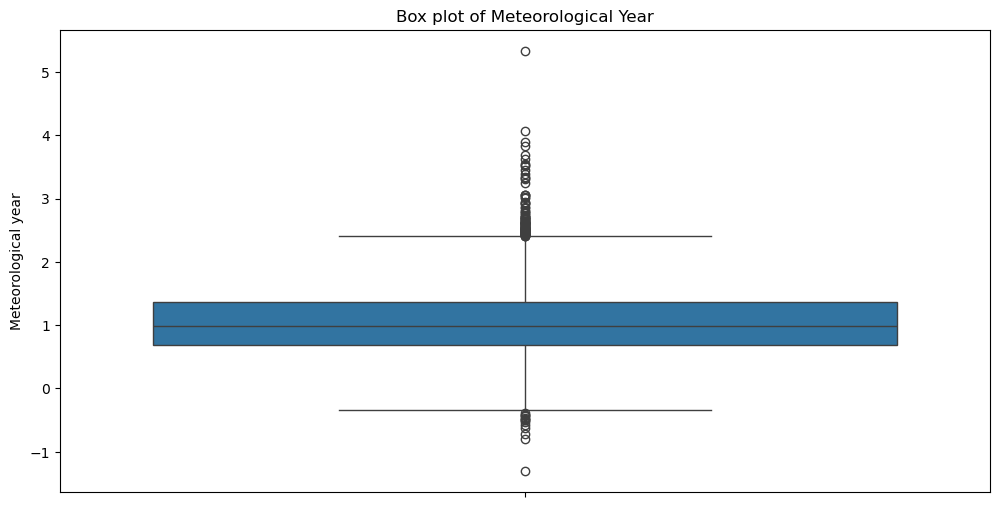

In [252]:
# box plot for the temp_final_df
plt.figure(figsize=(12, 6))
sns.boxplot(y='Meteorological year', data=temp_final_df)
plt.title('Box plot of Meteorological Year')
plt.show()

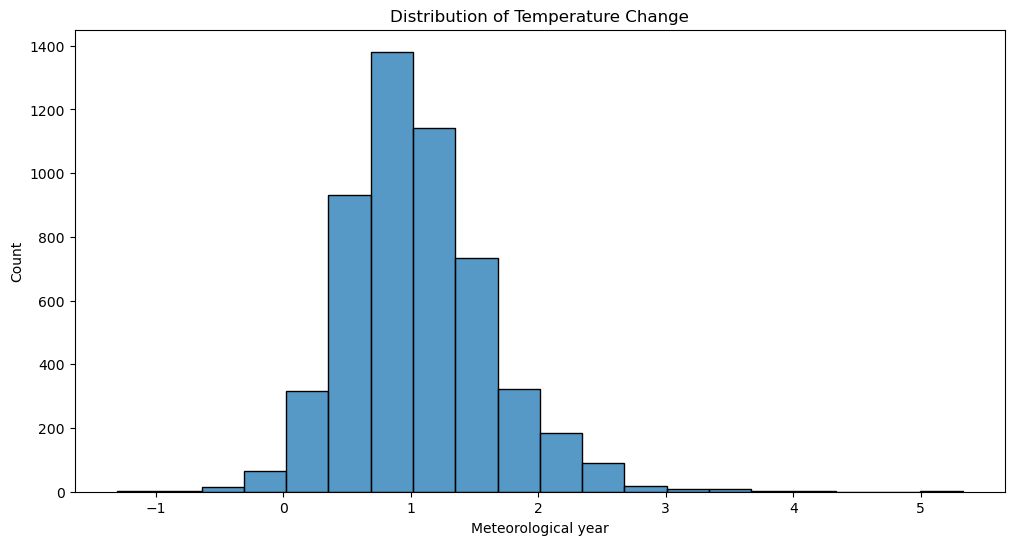

In [253]:
# distribution for the temp_final_df
plt.figure(figsize=(12, 6))
sns.histplot(temp_final_df['Meteorological year'], bins=20)
plt.title('Distribution of Temperature Change')
plt.show()

In [254]:
# save to a csv
temp_final_df.to_csv('temp_final_df.csv', index=False)

### Land Use Data Set

In [255]:
land_use_df.shape

(97995, 15)

In [256]:
land_use_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1980,1980,1000 ha,65286.0,A,Official figure,NaN
1,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1981,1981,1000 ha,65286.0,A,Official figure,NaN
2,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1982,1982,1000 ha,65286.0,A,Official figure,NaN
3,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1983,1983,1000 ha,65286.0,A,Official figure,NaN
4,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1984,1984,1000 ha,65286.0,A,Official figure,NaN


In [257]:
land_use_df.describe()

,Area Code (M49),Element Code,Item Code,Year Code,Year,Value
count,97995.000000,97995.0,97995.000000,97995.000000,97995.000000,9.799500e+04
mean,430.530884,5110.0,6627.879984,2002.966988,2002.966988,2.044488e+04
std,255.076689,0.0,26.601230,11.828224,11.828224,9.502952e+04
min,4.000000,5110.0,6600.000000,1980.000000,1980.000000,0.000000e+00
25%,208.000000,5110.0,6602.000000,1993.000000,1993.000000,3.000000e+01
50%,426.000000,5110.0,6621.000000,2004.000000,2004.000000,7.037793e+02
75%,646.000000,5110.0,6650.000000,2013.000000,2013.000000,6.500000e+03
max,894.000000,5110.0,6695.000000,2021.000000,2021.000000,2.241237e+06


In [258]:
land_use_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97995 entries, 0 to 97994
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       97995 non-null  object 
 1   Domain            97995 non-null  object 
 2   Area Code (M49)   97995 non-null  int64  
 3   Area              97995 non-null  object 
 4   Element Code      97995 non-null  int64  
 5   Element           97995 non-null  object 
 6   Item Code         97995 non-null  int64  
 7   Item              97995 non-null  object 
 8   Year Code         97995 non-null  int64  
 9   Year              97995 non-null  int64  
 10  Unit              97995 non-null  object 
 11  Value             97995 non-null  float64
 12  Flag              97995 non-null  object 
 13  Flag Description  97995 non-null  object 
 14  Note              1 non-null      object 
dtypes: float64(1), int64(5), object(9)
memory usage: 11.2+ MB


In [259]:
# Pivot the table to create a separate column for each unique item, and fill it with the 'Value'
land_use_pivoted_df = land_use_df.pivot_table(index=["Area", "Year"], columns="Item", values="Value", fill_value=None)
land_use_pivoted_df.reset_index(inplace=True)

In [260]:
land_use_pivoted_df.head()


Item,Area,Year,Agricultural land,Agriculture,Agriculture area actually irrigated,Arable land,Country area,Cropland,Cropland area actually irrigated,Farm buildings and Farmyards,...,Land area actually irrigated,Land area equipped for irrigation,Perm. meadows & pastures - Cultivated,Perm. meadows & pastures - Nat. growing,Perm. meadows & pastures area actually irrig.,Permanent crops,Permanent meadows and pastures,Temporary crops,Temporary fallow,Temporary meadows and pastures
0,Afghanistan,1980,38049.0,38049.0,NaN,7910.0,65286.0,8049.0,NaN,NaN,...,NaN,2505.0,NaN,NaN,NaN,139.0,30000.0,NaN,NaN,NaN
1,Afghanistan,1981,38053.0,38053.0,NaN,7910.0,65286.0,8053.0,NaN,NaN,...,NaN,2520.0,NaN,NaN,NaN,143.0,30000.0,NaN,NaN,NaN
2,Afghanistan,1982,38054.0,38054.0,NaN,7910.0,65286.0,8054.0,NaN,NaN,...,NaN,2535.0,NaN,NaN,NaN,144.0,30000.0,NaN,NaN,NaN
3,Afghanistan,1983,38054.0,38054.0,NaN,7910.0,65286.0,8054.0,NaN,NaN,...,NaN,2550.0,NaN,NaN,NaN,144.0,30000.0,NaN,NaN,NaN
4,Afghanistan,1984,38054.0,38054.0,NaN,7910.0,65286.0,8054.0,NaN,NaN,...,NaN,2581.0,NaN,NaN,NaN,144.0,30000.0,NaN,NaN,NaN


In [261]:
land_use_pivoted_df.shape

(9519, 22)

In [262]:
land_use_pivoted_df.isnull().sum()

Item
Area                                                0
Year                                                0
Agricultural land                                 307
Agriculture                                       307
Agriculture area actually irrigated              8436
Arable land                                       559
Country area                                        0
Cropland                                          433
Cropland area actually irrigated                 8921
Farm buildings and Farmyards                     9337
Forestry area actually irrigated                 9478
Land area                                           0
Land area actually irrigated                     9347
Land area equipped for irrigation                2095
Perm. meadows & pastures - Cultivated            8558
Perm. meadows & pastures - Nat. growing          8463
Perm. meadows & pastures area actually irrig.    9356
Permanent crops                                  1095
Permanent meadows and p

In [263]:
land_use_pivoted_df.isnull().mean() * 100

Item
Area                                              0.000000
Year                                              0.000000
Agricultural land                                 3.225129
Agriculture                                       3.225129
Agriculture area actually irrigated              88.622754
Arable land                                       5.872466
Country area                                      0.000000
Cropland                                          4.548797
Cropland area actually irrigated                 93.717828
Farm buildings and Farmyards                     98.088034
Forestry area actually irrigated                 99.569282
Land area                                         0.000000
Land area actually irrigated                     98.193088
Land area equipped for irrigation                22.008614
Perm. meadows & pastures - Cultivated            89.904402
Perm. meadows & pastures - Nat. growing          88.906398
Perm. meadows & pastures area actually irrig.    98

In [264]:
land_use_pivoted_df.eq(0).sum()

Item
Area                                               0
Year                                               0
Agricultural land                                  0
Agriculture                                        0
Agriculture area actually irrigated                1
Arable land                                        0
Country area                                       0
Cropland                                           0
Cropland area actually irrigated                  14
Farm buildings and Farmyards                       3
Forestry area actually irrigated                  19
Land area                                          0
Land area actually irrigated                       0
Land area equipped for irrigation                  0
Perm. meadows & pastures - Cultivated              0
Perm. meadows & pastures - Nat. growing           21
Perm. meadows & pastures area actually irrig.     22
Permanent crops                                    0
Permanent meadows and pastures           

In [265]:
land_use_pivoted_df.columns

Index(['Area', 'Year', 'Agricultural land', 'Agriculture',
       'Agriculture area actually irrigated', 'Arable land', 'Country area',
       'Cropland', 'Cropland area actually irrigated',
       'Farm buildings and Farmyards', 'Forestry area actually irrigated',
       'Land area', 'Land area actually irrigated',
       'Land area equipped for irrigation',
       'Perm. meadows & pastures - Cultivated',
       'Perm. meadows & pastures - Nat. growing',
       'Perm. meadows & pastures area actually irrig.', 'Permanent crops',
       'Permanent meadows and pastures', 'Temporary crops', 'Temporary fallow',
       'Temporary meadows and pastures'],
      dtype='object', name='Item')

In [266]:
land_use_final_df = land_use_pivoted_df[['Area', 'Year', 'Country area', 'Land area', 'Arable land', 'Cropland', 'Agricultural land', 
                                         'Agriculture', 'Permanent crops', 'Permanent meadows and pastures']]

In [267]:
land_use_final_df.head()

Item,Area,Year,Country area,Land area,Arable land,Cropland,Agricultural land,Agriculture,Permanent crops,Permanent meadows and pastures
0,Afghanistan,1980,65286.0,65223.0,7910.0,8049.0,38049.0,38049.0,139.0,30000.0
1,Afghanistan,1981,65286.0,65223.0,7910.0,8053.0,38053.0,38053.0,143.0,30000.0
2,Afghanistan,1982,65286.0,65223.0,7910.0,8054.0,38054.0,38054.0,144.0,30000.0
3,Afghanistan,1983,65286.0,65223.0,7910.0,8054.0,38054.0,38054.0,144.0,30000.0
4,Afghanistan,1984,65286.0,65223.0,7910.0,8054.0,38054.0,38054.0,144.0,30000.0


In [268]:
land_use_final_df.describe()

Item,Year,Country area,Land area,Arable land,Cropland,Agricultural land,Agriculture,Permanent crops,Permanent meadows and pastures
count,9519.000000,9.519000e+03,9.519000e+03,8960.000000,9086.000000,9212.000000,9212.000000,8424.000000,8478.000000
mean,2001.067129,6.366904e+04,6.161397e+04,6962.495726,7552.489323,24139.138251,24193.852583,740.497644,18134.910709
std,12.027339,1.951996e+05,1.878466e+05,22959.349868,24025.752755,72112.884376,72362.751677,2138.970543,56307.434290
min,1980.000000,4.400000e-02,4.400000e-02,0.064000,0.064000,0.300000,0.300000,0.008400,0.000000
25%,1991.000000,2.510000e+02,2.500000e+02,20.000000,34.000000,76.000000,76.000000,10.000000,70.000000
50%,2001.000000,8.387900e+03,8.252000e+03,877.000000,1000.000000,2323.000000,2326.000000,97.000000,1113.254100
75%,2011.500000,4.383200e+04,4.104500e+04,3700.000000,4331.005675,15234.000000,15234.000000,413.000000,10865.500000
max,2021.000000,2.241237e+06,2.192334e+06,227520.000000,232062.000000,558425.000000,558425.000000,27300.000000,477684.000000


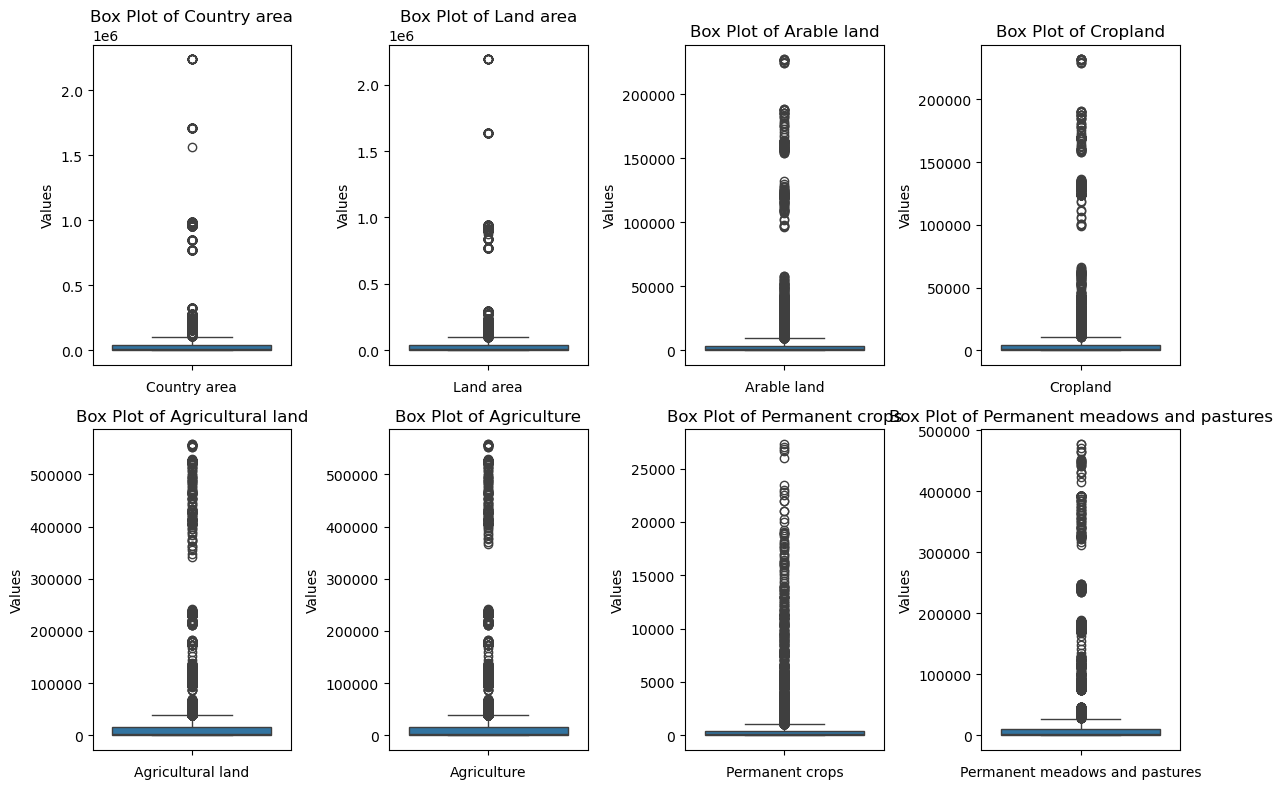

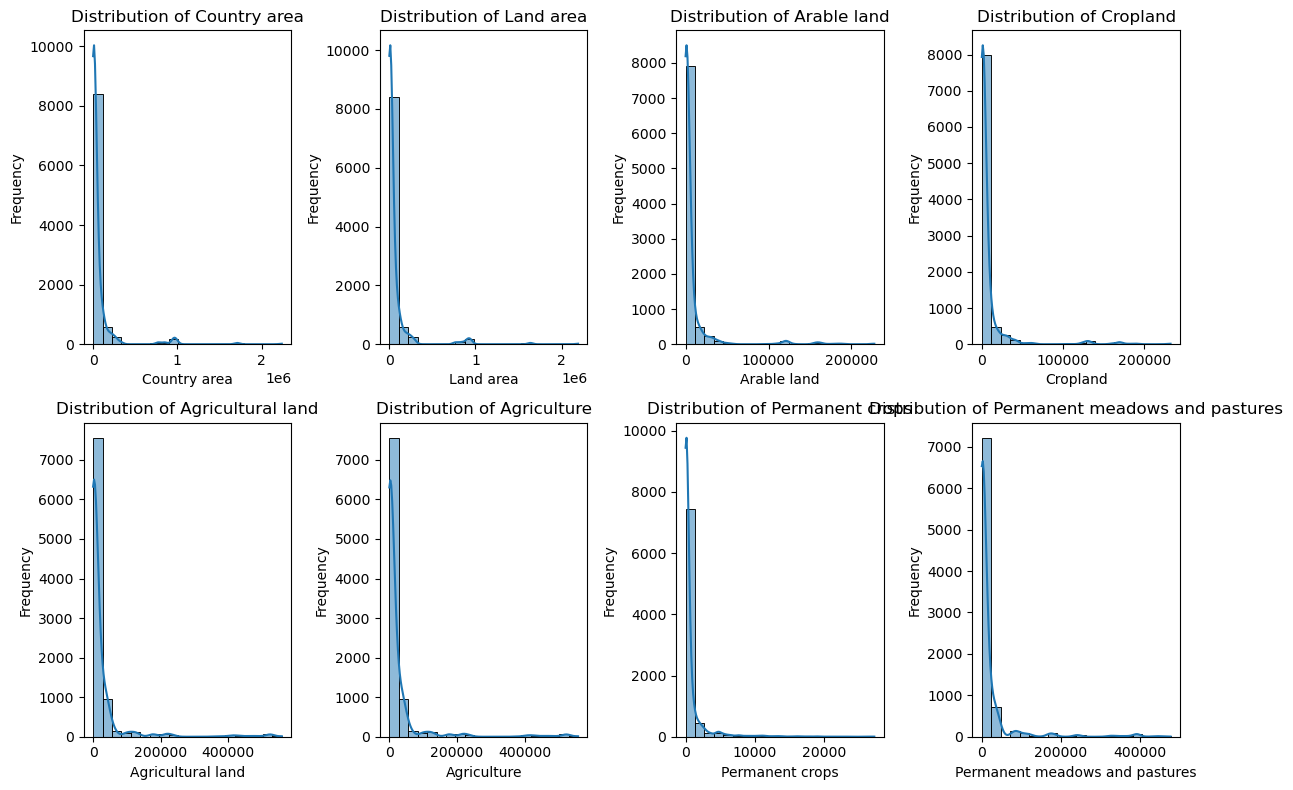

In [269]:
columns_to_plot = ['Country area', 'Land area', 'Arable land', 'Cropland', 'Agricultural land', 
                   'Agriculture', 'Permanent crops', 'Permanent meadows and pastures']

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a box plot for each column
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 4, i)  # Adjust subplot layout based on the number of columns; here it's arranged in 2 rows and 4 columns
    sns.boxplot(y=land_use_final_df[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel('Values')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

# Distribution plots
plt.figure(figsize=(12, 8))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 4, i)  # Adjust subplot layout based on the number of columns
    sns.histplot(land_use_final_df[column], kde=True, bins=20)  # Kernel density estimate (kde) is added to smooth the histogram
    plt.title(f'Distribution of {column}')
    plt.ylabel('Frequency')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


In [270]:
# save to a csv
land_use_final_df.to_csv('land_use_final_df.csv', index=False)

In [271]:
pest_df.shape

(35202, 15)

In [272]:
pest_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),2000,2000,t,307.98,E,Estimated value,NaN
1,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),2000,2000,kg/ha,0.44,E,Estimated value,NaN
2,RP,Pesticides Use,8,Albania,5173,Use per value of agricultural production,1357,Pesticides (total),2000,2000,g/Int$,0.23,E,Estimated value,NaN
3,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),2001,2001,t,319.38,E,Estimated value,NaN
4,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),2001,2001,kg/ha,0.46,E,Estimated value,NaN


In [273]:
pest_df.describe()

,Area Code (M49),Element Code,Item Code,Year Code,Year,Value
count,35202.000000,35202.000000,35202.000000,35202.000000,35202.000000,35202.000000
mean,424.550423,5158.978694,1340.576445,2010.510852,2010.510852,3855.186176
std,248.441525,4.950079,17.776129,6.341302,6.341302,24198.051890
min,8.000000,5157.000000,1309.000000,2000.000000,2000.000000,0.000000
25%,208.000000,5157.000000,1320.000000,2005.000000,2005.000000,0.430000
50%,418.000000,5157.000000,1345.000000,2011.000000,2011.000000,8.075000
75%,626.000000,5157.000000,1357.000000,2016.000000,2016.000000,366.012500
max,894.000000,5173.000000,1357.000000,2021.000000,2021.000000,719507.440000


In [274]:
pest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35202 entries, 0 to 35201
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       35202 non-null  object 
 1   Domain            35202 non-null  object 
 2   Area Code (M49)   35202 non-null  int64  
 3   Area              35202 non-null  object 
 4   Element Code      35202 non-null  int64  
 5   Element           35202 non-null  object 
 6   Item Code         35202 non-null  int64  
 7   Item              35202 non-null  object 
 8   Year Code         35202 non-null  int64  
 9   Year              35202 non-null  int64  
 10  Unit              35202 non-null  object 
 11  Value             35202 non-null  float64
 12  Flag              35202 non-null  object 
 13  Flag Description  35202 non-null  object 
 14  Note              198 non-null    object 
dtypes: float64(1), int64(5), object(9)
memory usage: 4.0+ MB


In [275]:
pest_df.columns

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value',
       'Flag', 'Flag Description', 'Note'],
      dtype='object')

In [276]:
# checking if there are null values in the Value column in the pest_df
pest_df['Value'].isnull().sum()

0

**Separating out the element values for each item**

In [277]:
aug_df = pest_df[
    (pest_df['Element'] == 'Agricultural Use') |
    ((pest_df['Item'] == 'Pesticides (total)') & pest_df['Element'].isin(['Use per area of cropland', 'Use per value of agricultural production']))
]

In [278]:
aug_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),2000,2000,t,307.98,E,Estimated value,NaN
1,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),2000,2000,kg/ha,0.44,E,Estimated value,NaN
2,RP,Pesticides Use,8,Albania,5173,Use per value of agricultural production,1357,Pesticides (total),2000,2000,g/Int$,0.23,E,Estimated value,NaN
3,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),2001,2001,t,319.38,E,Estimated value,NaN
4,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),2001,2001,kg/ha,0.46,E,Estimated value,NaN


In [279]:
pest_separate_df = aug_df.pivot_table(
    index=['Area Code (M49)', 'Area', 'Year'],
    columns=['Item', 'Element'],
    values='Value',
    aggfunc='sum'
).reset_index()

In [280]:
pest_separate_df.columns = ['_'.join(col).strip() if col[1] else col[0] for col in pest_separate_df.columns.values]

In [281]:
pest_separate_df.head()

,Area Code (M49),Area,Year,Fungicides and Bactericides_Agricultural Use,Fungicides – Seed treatments_Agricultural Use,Herbicides_Agricultural Use,Insecticides_Agricultural Use,Insecticides – Seed Treatments_Agricultural Use,Pesticides (total)_Agricultural Use,Pesticides (total)_Use per area of cropland,Pesticides (total)_Use per value of agricultural production,Rodenticides_Agricultural Use
0,8,Albania,2000,105.73,0.05,7.99,169.60,9.01,307.98,0.44,0.23,7.54
1,8,Albania,2001,108.08,0.06,7.99,174.52,10.81,319.38,0.46,0.23,8.25
2,8,Albania,2002,110.43,0.07,7.98,179.44,12.61,330.78,0.47,0.24,8.96
3,8,Albania,2003,112.77,0.08,7.98,184.36,14.41,342.17,0.49,0.24,9.67
4,8,Albania,2004,115.12,0.09,7.98,189.28,16.21,353.57,0.51,0.23,10.37


In [282]:
pest_separate_df.columns

Index(['Area Code (M49)', 'Area', 'Year',
       'Fungicides and Bactericides_Agricultural Use',
       'Fungicides – Seed treatments_Agricultural Use',
       'Herbicides_Agricultural Use', 'Insecticides_Agricultural Use',
       'Insecticides – Seed Treatments_Agricultural Use',
       'Pesticides (total)_Agricultural Use',
       'Pesticides (total)_Use per area of cropland',
       'Pesticides (total)_Use per value of agricultural production',
       'Rodenticides_Agricultural Use'],
      dtype='object')

In [283]:
# check if there are null values 
pest_separate_df.isnull().sum()

Area Code (M49)                                                   0
Area                                                              0
Year                                                              0
Fungicides and Bactericides_Agricultural Use                     44
Fungicides – Seed treatments_Agricultural Use                  2002
Herbicides_Agricultural Use                                     132
Insecticides_Agricultural Use                                     0
Insecticides – Seed Treatments_Agricultural Use                2265
Pesticides (total)_Agricultural Use                               0
Pesticides (total)_Use per area of cropland                     561
Pesticides (total)_Use per value of agricultural production     792
Rodenticides_Agricultural Use                                   726
dtype: int64

In [284]:
pest_separate_df.isnull().mean() * 100

Area Code (M49)                                                 0.000000
Area                                                            0.000000
Year                                                            0.000000
Fungicides and Bactericides_Agricultural Use                    0.949094
Fungicides – Seed treatments_Agricultural Use                  43.183779
Herbicides_Agricultural Use                                     2.847282
Insecticides_Agricultural Use                                   0.000000
Insecticides – Seed Treatments_Agricultural Use                48.856773
Pesticides (total)_Agricultural Use                             0.000000
Pesticides (total)_Use per area of cropland                    12.100949
Pesticides (total)_Use per value of agricultural production    17.083693
Rodenticides_Agricultural Use                                  15.660052
dtype: float64

In [285]:
pest_separate_df.shape

(4636, 12)

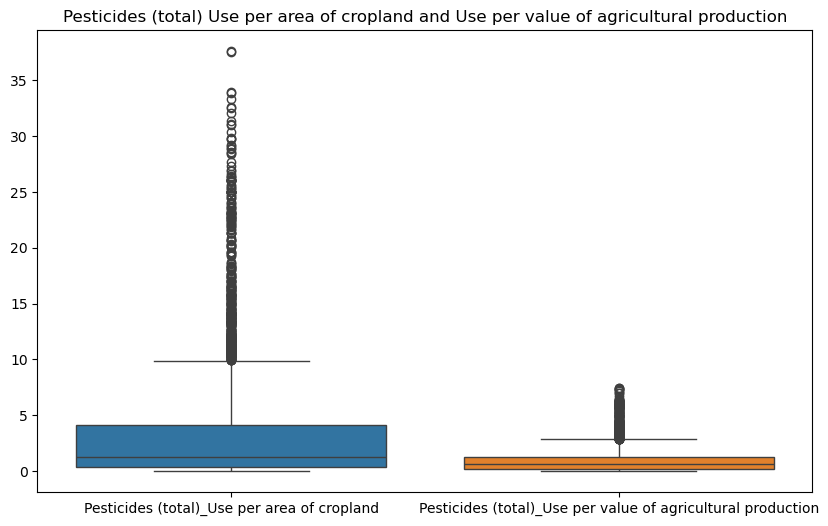

In [286]:
# do a box plot to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=pest_separate_df[['Pesticides (total)_Use per area of cropland', 'Pesticides (total)_Use per value of agricultural production']])
plt.title('Pesticides (total) Use per area of cropland and Use per value of agricultural production')
plt.show()

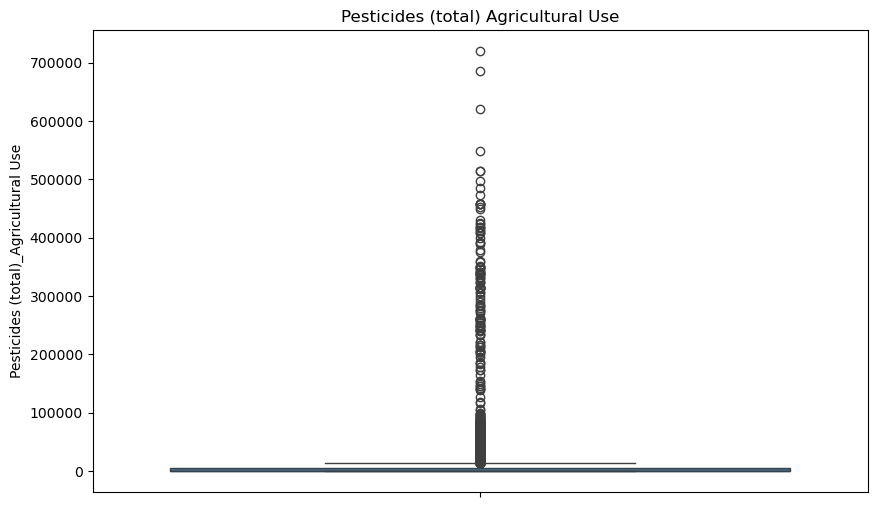

In [287]:
# do a box plot for Pesticides (total)_agricultural use
plt.figure(figsize=(10, 6))
sns.boxplot(data=pest_separate_df['Pesticides (total)_Agricultural Use'])
plt.title('Pesticides (total) Agricultural Use')
plt.show()

In [288]:
# check the number of 0 values in the Pesticides (total)_Agricultural Use column
(pest_separate_df['Pesticides (total)_Agricultural Use'] == 0).sum()

0

In [289]:
pest_final_df = pest_separate_df[['Area', 'Year', 'Fungicides and Bactericides_Agricultural Use', 'Herbicides_Agricultural Use', 'Insecticides_Agricultural Use', 'Pesticides (total)_Agricultural Use', 'Pesticides (total)_Use per area of cropland', 'Pesticides (total)_Use per value of agricultural production', 'Rodenticides_Agricultural Use']]

In [290]:
pest_final_df.head()

,Area,Year,Fungicides and Bactericides_Agricultural Use,Herbicides_Agricultural Use,Insecticides_Agricultural Use,Pesticides (total)_Agricultural Use,Pesticides (total)_Use per area of cropland,Pesticides (total)_Use per value of agricultural production,Rodenticides_Agricultural Use
0,Albania,2000,105.73,7.99,169.60,307.98,0.44,0.23,7.54
1,Albania,2001,108.08,7.99,174.52,319.38,0.46,0.23,8.25
2,Albania,2002,110.43,7.98,179.44,330.78,0.47,0.24,8.96
3,Albania,2003,112.77,7.98,184.36,342.17,0.49,0.24,9.67
4,Albania,2004,115.12,7.98,189.28,353.57,0.51,0.23,10.37


In [291]:
pest_final_df.shape

(4636, 9)

In [292]:
# summary statistics for the pest_final_df
pest_final_df.describe()

,Year,Fungicides and Bactericides_Agricultural Use,Herbicides_Agricultural Use,Insecticides_Agricultural Use,Pesticides (total)_Agricultural Use,Pesticides (total)_Use per area of cropland,Pesticides (total)_Use per value of agricultural production,Rodenticides_Agricultural Use
count,4636.000000,4592.000000,4504.000000,4636.000000,4636.000000,4075.000000,3844.000000,3910.000000
mean,2010.510354,3443.014575,7289.604867,3476.340214,15172.703423,3.410599,0.961465,101.792995
std,6.342244,11062.696865,30323.919388,14666.965729,54988.220227,5.169300,1.109078,804.652133
min,2000.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
25%,2005.000000,8.977500,15.822500,22.175000,93.222500,0.340000,0.230000,0.000000
50%,2011.000000,185.435000,265.005000,164.500000,842.640000,1.250000,0.600000,0.360000
75%,2016.000000,1624.500000,2011.812500,815.110000,5334.270000,4.175000,1.280000,9.475000
max,2021.000000,168169.410000,413833.410000,203482.780000,719507.440000,37.610000,7.430000,11608.810000


In [293]:
pest_final_df.isnull().mean()* 100

Area                                                            0.000000
Year                                                            0.000000
Fungicides and Bactericides_Agricultural Use                    0.949094
Herbicides_Agricultural Use                                     2.847282
Insecticides_Agricultural Use                                   0.000000
Pesticides (total)_Agricultural Use                             0.000000
Pesticides (total)_Use per area of cropland                    12.100949
Pesticides (total)_Use per value of agricultural production    17.083693
Rodenticides_Agricultural Use                                  15.660052
dtype: float64

In [294]:
pest_final_df.eq(0).sum()

Area                                                              0
Year                                                              0
Fungicides and Bactericides_Agricultural Use                    172
Herbicides_Agricultural Use                                     132
Insecticides_Agricultural Use                                    19
Pesticides (total)_Agricultural Use                               0
Pesticides (total)_Use per area of cropland                      80
Pesticides (total)_Use per value of agricultural production      66
Rodenticides_Agricultural Use                                  1409
dtype: int64

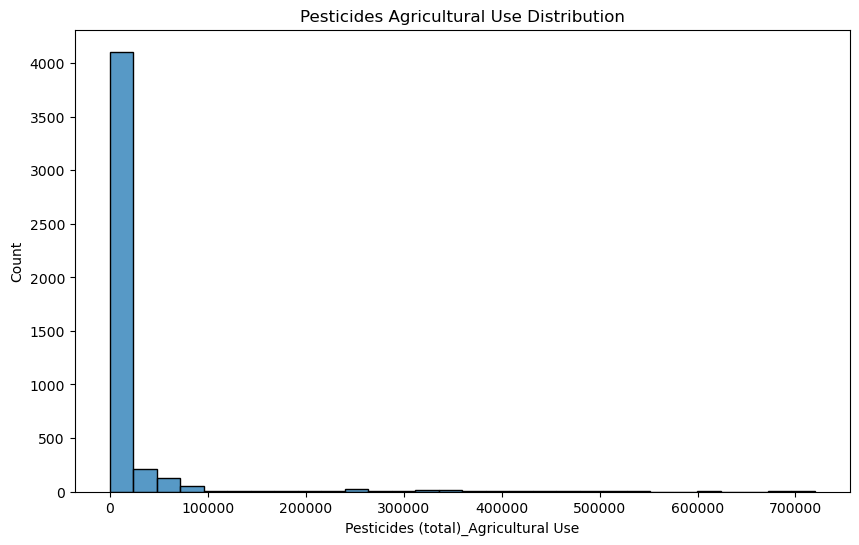

In [295]:
# distribution plot for the Pesticides_Agricultural_Use_Pesticides column
plt.figure(figsize=(10, 6))
sns.histplot(pest_final_df['Pesticides (total)_Agricultural Use'], bins=30)
plt.title('Pesticides Agricultural Use Distribution')
plt.show()

In [296]:
# save to a csv
pest_final_df.to_csv('pest_final_df.csv', index=False)